---
title: Data Preprocessing
subtitle: Advanced Techniques for Data Cleaning and Transformation
abstract: This notebook provides an introduction to data wrangling and preprocessing techniques in Python. It covers strategies for identifying and handling missing data, merging datasets, and reshaping data into tidy formats for analysis and visualization. Practical examples demonstrate how to clean, transform, and prepare real-world datasets, emphasizing best practices for ensuring data quality and usability in data science workflows.
author:
  - name: Karol Flisikowski
    affiliations: 
      - Gdansk University of Technology
      - Chongqing Technology and Business University
    orcid: 0000-0002-4160-1297
    email: karol@ctbu.edu.cn
date: 2025-04-29
---

## Goals of this lecture

A *huge* $\%$ of science involves **data wrangling**. 

This could be an entire course on its own, but today we'll focus on:

- What is **data wrangling**? 
- What to do about **missing values**?
- How to **combine** datasets?
- **Tidy data**!
   - What is it?
   - How do we make *our* data tidy?

## Importing relevant libraries

In [11]:
import seaborn as sns ### importing seaborn
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

## What is data wrangling?

> **Data wrangling** refers to *manipulating*, *reshaping*, or *transforming* a dataset as needed for your goals (e.g., visualization and/or analysis).

- A huge $\%$ of working with data involves "wrangling".
- Includes:
   - "Cleaning" data (missing values, recasting variables, etc.). 
   - Merging/combining different datasets.
   - Reshaping data as needed.

### Data Wrangling with Pandas

**CHEAT-SHEET** is available [here](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

<iframe width="560" height="315" src="https://www.youtube.com/embed/x0Sy6Kl0Mzw?si=BXGWrzrH_6690Jlf" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

## Types of missing data

Before we start analyzing missing values, it is important to understand the different reasons for missing data. Generally speaking, there are three possible reasons:

**1. Missing completely at random (MCAR)**.

>The missing values ​​of a given variable (Y) are not related to other variables in the data set or to the variable (Y) itself. In other words, there is no specific reason for the missing values.

**2. Missing at random (MAR)**.

>MAR occurs when the missing value is not random, but when the missing value can be fully explained by variables for which there is complete information.

**3. Missing not at random (MNAR)**.

>The missing value depends on unobserved data or on the values ​​of the missing data itself.

### MCAR

**What does it mean?** When missing data points do not follow any particular reasoning or pattern.

- Example 1. You have demographic data for your community. But the “Middle Name” variable is missing 50% of the values. This 50% of the data is a perfect example of MCAR data. There is no pattern or reason why the middle name is blank in most of the entries.

- Example 2. In a paper survey, one page accidentally fell out of several forms during shipping. So the answers to questions on page 3 are missing, but regardless of who the respondent was or how they answered earlier.

**How ​​to deal with this?**

For MCAR data, the following methods can be used:

1. Row-wise deletion: Delete a record if there is missing data in any of the variables/columns in the dataset. This works best only when the amount of missing data is small, such as when only 2% of the data in the dataset is missing completely at random.
2. Pairwise deletion: Pairwise deletion removes only the cases where one of the variables used in the statistical method under consideration is missing. It works on the same principle as the correlation matrix. In case of missing values ​​between two variables (in the sense of pairwise), finding the correlation matrix takes into account all the complete cases for those two variables. Suppose the number of cases in this scenario is N. After taking another set of variables and calculating the correlation matrix, the number of complete cases will be different from N. This serves as the main difference between rowwise and pairwise deletion. Pairwise deletion has the advantage of causing minimal data loss. In case of a data set which has common missing values ​​in almost all variables, pairwise deletion would be a wiser choice to deal with the missing values. 3. Mean, Median and Mode Imputation: Missing values ​​can also be replaced by the mean, median and mode of the respective variables.

### MAR

**What does it mean?** When missing data points follow a pattern.

- Example 1. Take the same example of demographic data for your community. But this time, the salaries of several men over the age of 45 are missing.

- Example 2. In a health survey, women are more likely than men to not report their weight. Missing data is determined by gender (which is known), but not by the weight value itself.

In this case, missing data is imputed to data from another variable. As such, it is a “missing at random” mechanism. MAR is probably the most difficult to understand because of its name.

**How ​​to deal with it?**

Because there is a relationship in this mechanism, the best option would be to use an imputation technique—mean, median, mode, or multiple imputation.

### MNAR

**What does this mean?**

When the missing data points follow a pattern, it means that they follow the MNAR mechanism.

- Example 1. In the same demographic data of residents of your community, let's say that the salary of several men is missing when the salary exceeds a certain amount. (say, one million).

- Example 2. People with very high incomes do not want to disclose their earnings in the survey. The missing data on income depends directly on its value (i.e. the one that is missing).

In this case, we are dealing with the "Missing Not at Random" mechanism. Usually, when the missing data is not MCAR or MAR, it tends to follow MNAR.

**How ​​to deal with it?**

Since MNAR is a self-induced dependence, the best way to avoid it is to pool the data or model the missing data.

The reason we need to analyze the mechanisms of missing values ​​is that we need to understand the best way to impute a missing value so that the accuracy of our ML models remains unaffected.

## Dealing with *missing values*

- In practice, **real-world** data is often messy.  
- This includes **missing values**, which take on the value/label `NaN`.
   - `NaN` = "Not a Number".
- [Dealing with `NaN` values is one of the main challenges in EDA!](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)

### Loading a dataset with missing values

The [`titanic` dataset](https://www.kaggle.com/c/titanic/data?select=train.csv) contains information about different Titanic passengers and whether they `Survived (1 vs. 0)`. 

- Commonly used as a tutorial for machine learning, regression, and data wrangling.

In [3]:
df_titanic = pd.read_csv("data/wrangling/titanic.csv")
df_titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Why is missing data a problem?

If you're unaware of missing data:

- You might be **overestimating** the size of your dataset. 
- You might be **biasing** the results of a visualization or analysis (if missing data are non-randomly distributed).
- You might be **complicating** an analysis.
   - By default, many analysis packages will "drop" missing data––so you need to be aware of whether this is happening.

### How to deal with missing data

1. **Identify** whether and where your data has missing values.  
2. **Analyze** how these missing values are distributed.
3. **Decide** how to handle them.

Not an easy problem––especially step 3!

### Step 1: Identifying missing values

The first step is **identifying** whether and where your data has missing values.

There are several approaches to this:

- Using `.isna`
- Using `.info`
- Using `.isnull`

#### `isna()`

- The `isna()` function tells us whether a given *cell* of a `DataFrame` has a missing value or not (`True` vs. `False`). 
- If we call `isna().any()`, it tells us which *columns* have missing values.

In [9]:
df_titanic.isna().head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False


In [10]:
df_titanic.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

##### Inspecting columns with `nan`

Now we can inspect specific *columns* that have `nan` values.

In [11]:
df_titanic[df_titanic['Age'].isna()].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


##### How many `nan`?

If we call `sum` on the `nan` values, we can calculate exactly how many `nan` values are in each column.

In [17]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### `info`

The `info()` function gives us various information about the `DataFrame`, including the number of *not-null* (i.e., non-missing) values in each column.

In [18]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Check-in

How many rows of the `DataFrame` have missing values for `Cabin`? 

In [31]:
### Your code here

#### Solution

In [32]:
### How many? (Quite a few!)
df_titanic[df_titanic['Cabin'].isna()].shape

(687, 13)

#### Visualizing missing values

- Finally, we can *visualize* the rate of missing values across columns using `seaborn.heatmap`.  
  - The dark cells are those with not-null values.
  - The light cells have `nan` values.

<AxesSubplot:>

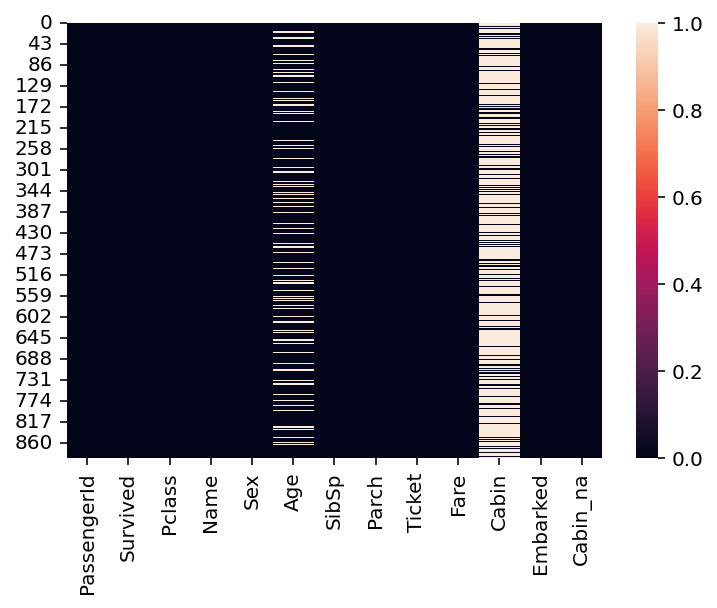

In [42]:
sns.heatmap(df_titanic.isna())

### Step 2: Analyze how the data are distributed

Having *identified* missing data, the next step is determining how those missing data are *distributed*.

#### Is variable $Y$ *different* depending on whether $X$ is `nan`?

One approach is to ask whether some variable of interest (e.g., `Survived`) is *different* depending on whether some *other* variable is `nan`.

In [33]:
### Mean survival for people without data about Cabin info
df_titanic[df_titanic['Cabin'].isna()]['Survived'].mean()

0.29985443959243085

In [30]:
### Mean survival for people *with* data about Cabin info
df_titanic[~df_titanic['Cabin'].isna()]['Survived'].mean()

0.6666666666666666

#### Check-in

What is the mean `Survived` rate for values with a `nan` value for `Age` vs. those with not-null values? How does this compare to the overall `Survived` rate?

In [36]:
### Your code here

#### Solution

In [37]:
### Mean survival for people without data about Age
df_titanic[df_titanic['Age'].isna()]['Survived'].mean()

0.2937853107344633

In [38]:
### Mean survival for people *with* data about Age
df_titanic[~df_titanic['Age'].isna()]['Survived'].mean()

0.4061624649859944

In [39]:
### Mean survival for people overall
df_titanic['Survived'].mean()

0.3838383838383838

#### Package `missingno`

If you want to dig deeper, you can check out the `missingno` Python library (which needs to be installed separately).

- [Tutorial for the `missingno` package](https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009).

- [Homepage for the `missingno` package](https://github.com/ResidentMario/missingno).

<iframe width="560" height="315" src="https://www.youtube.com/embed/Wdvwer7h-8w?si=HAHObrrWiYjbgPr5" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

### Finding the reason for missing data using a matrix chart

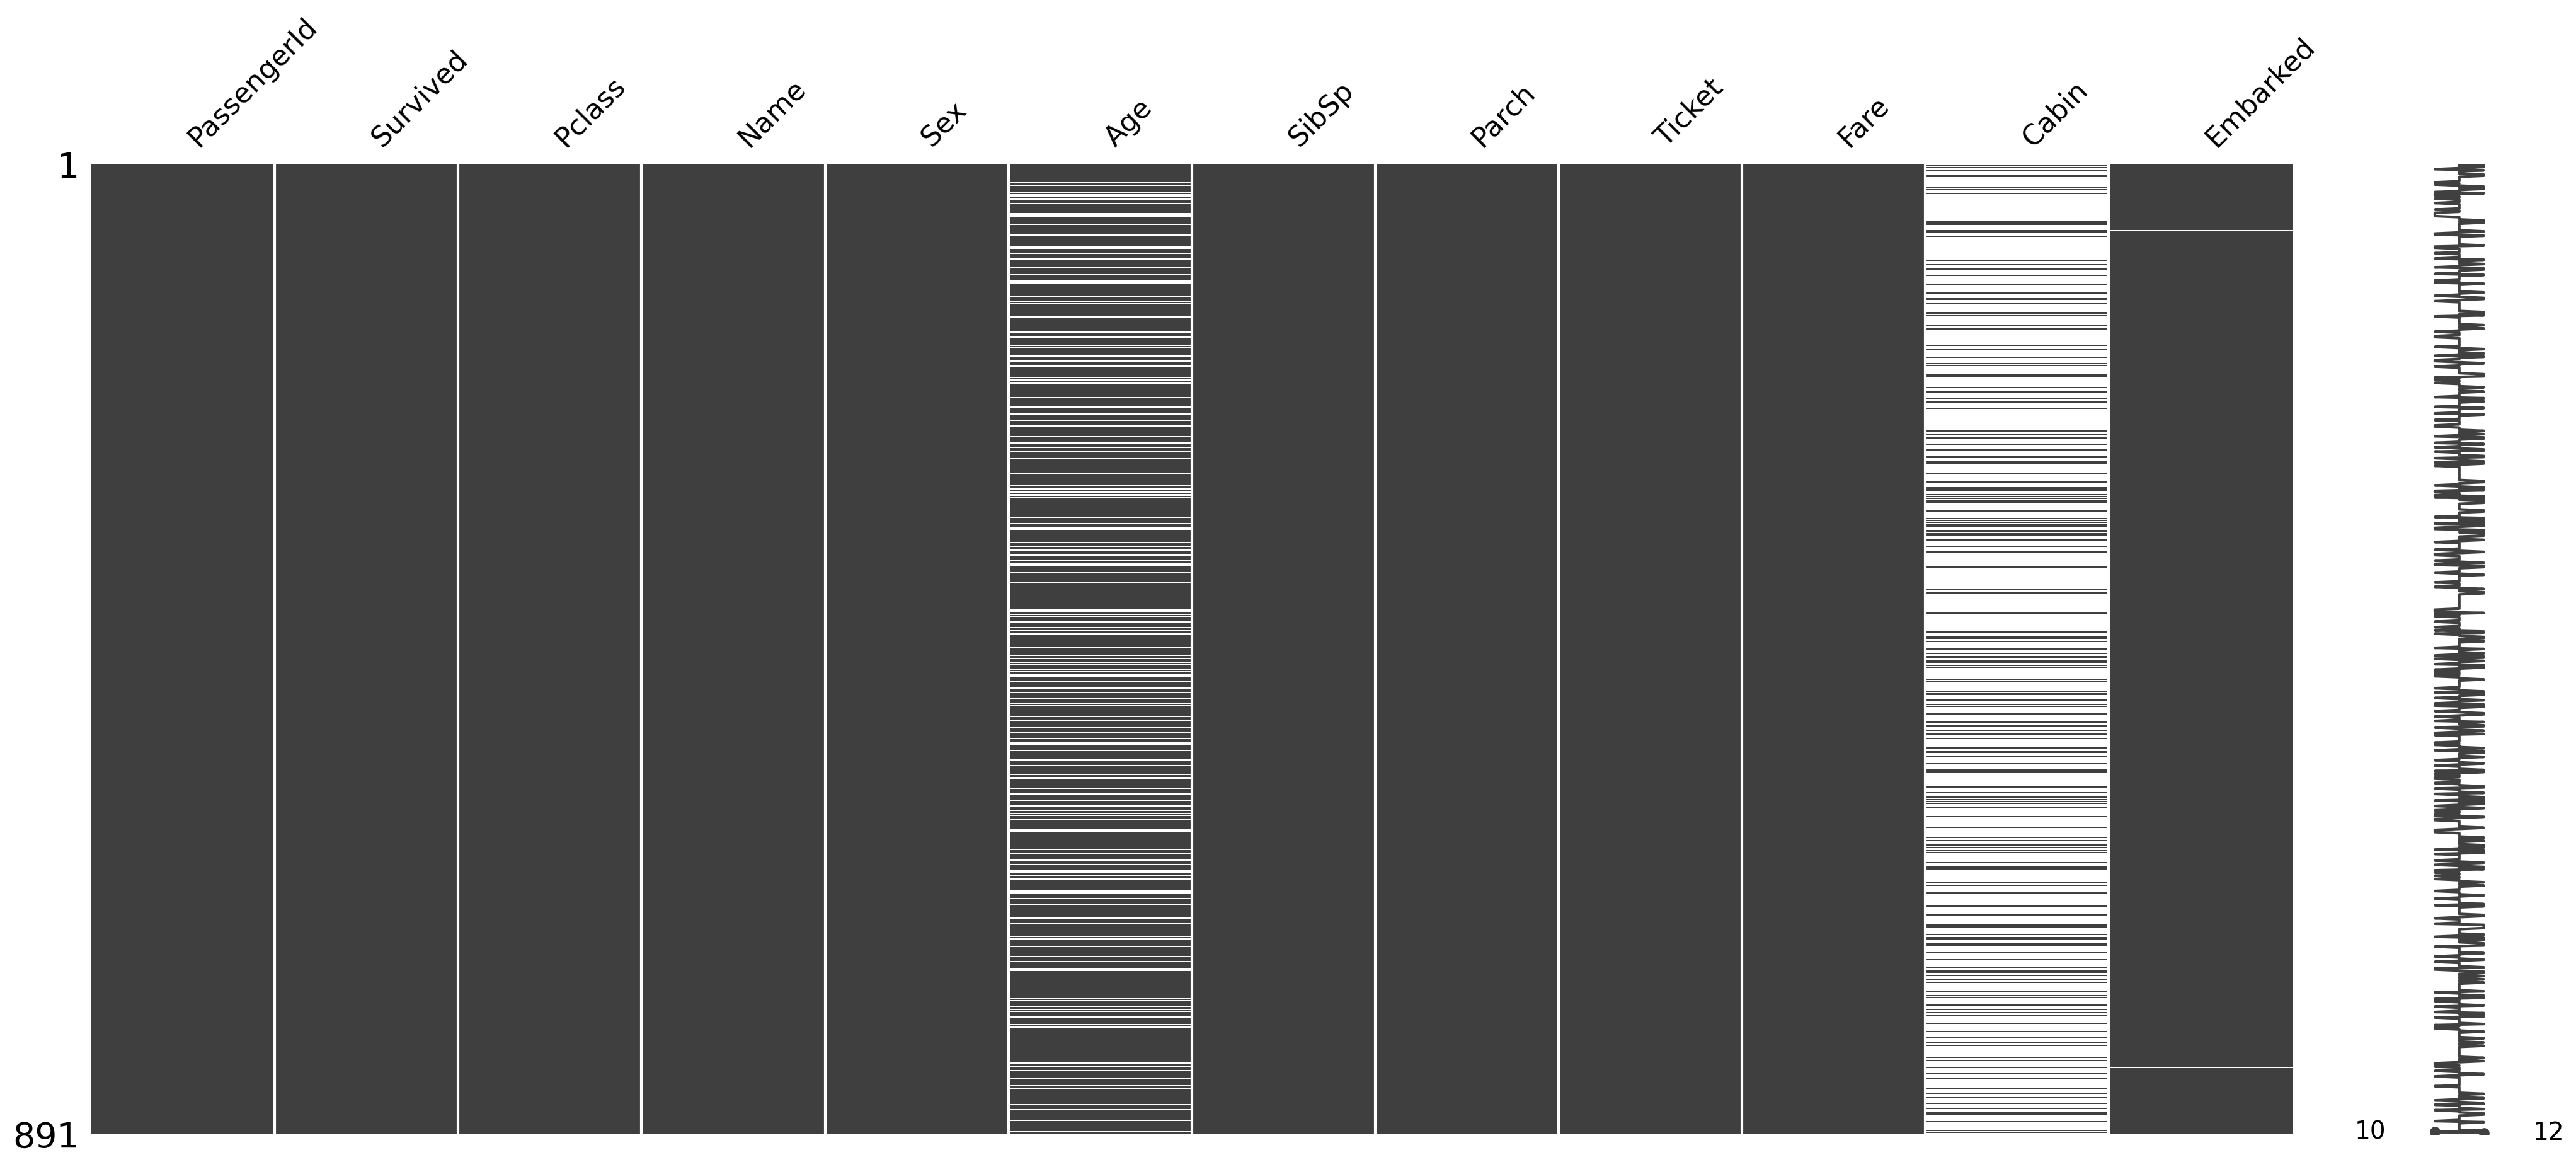

In [4]:
import missingno as msno
msno.matrix(df_titanic);

### Finding the cause of missing data using Heatmap

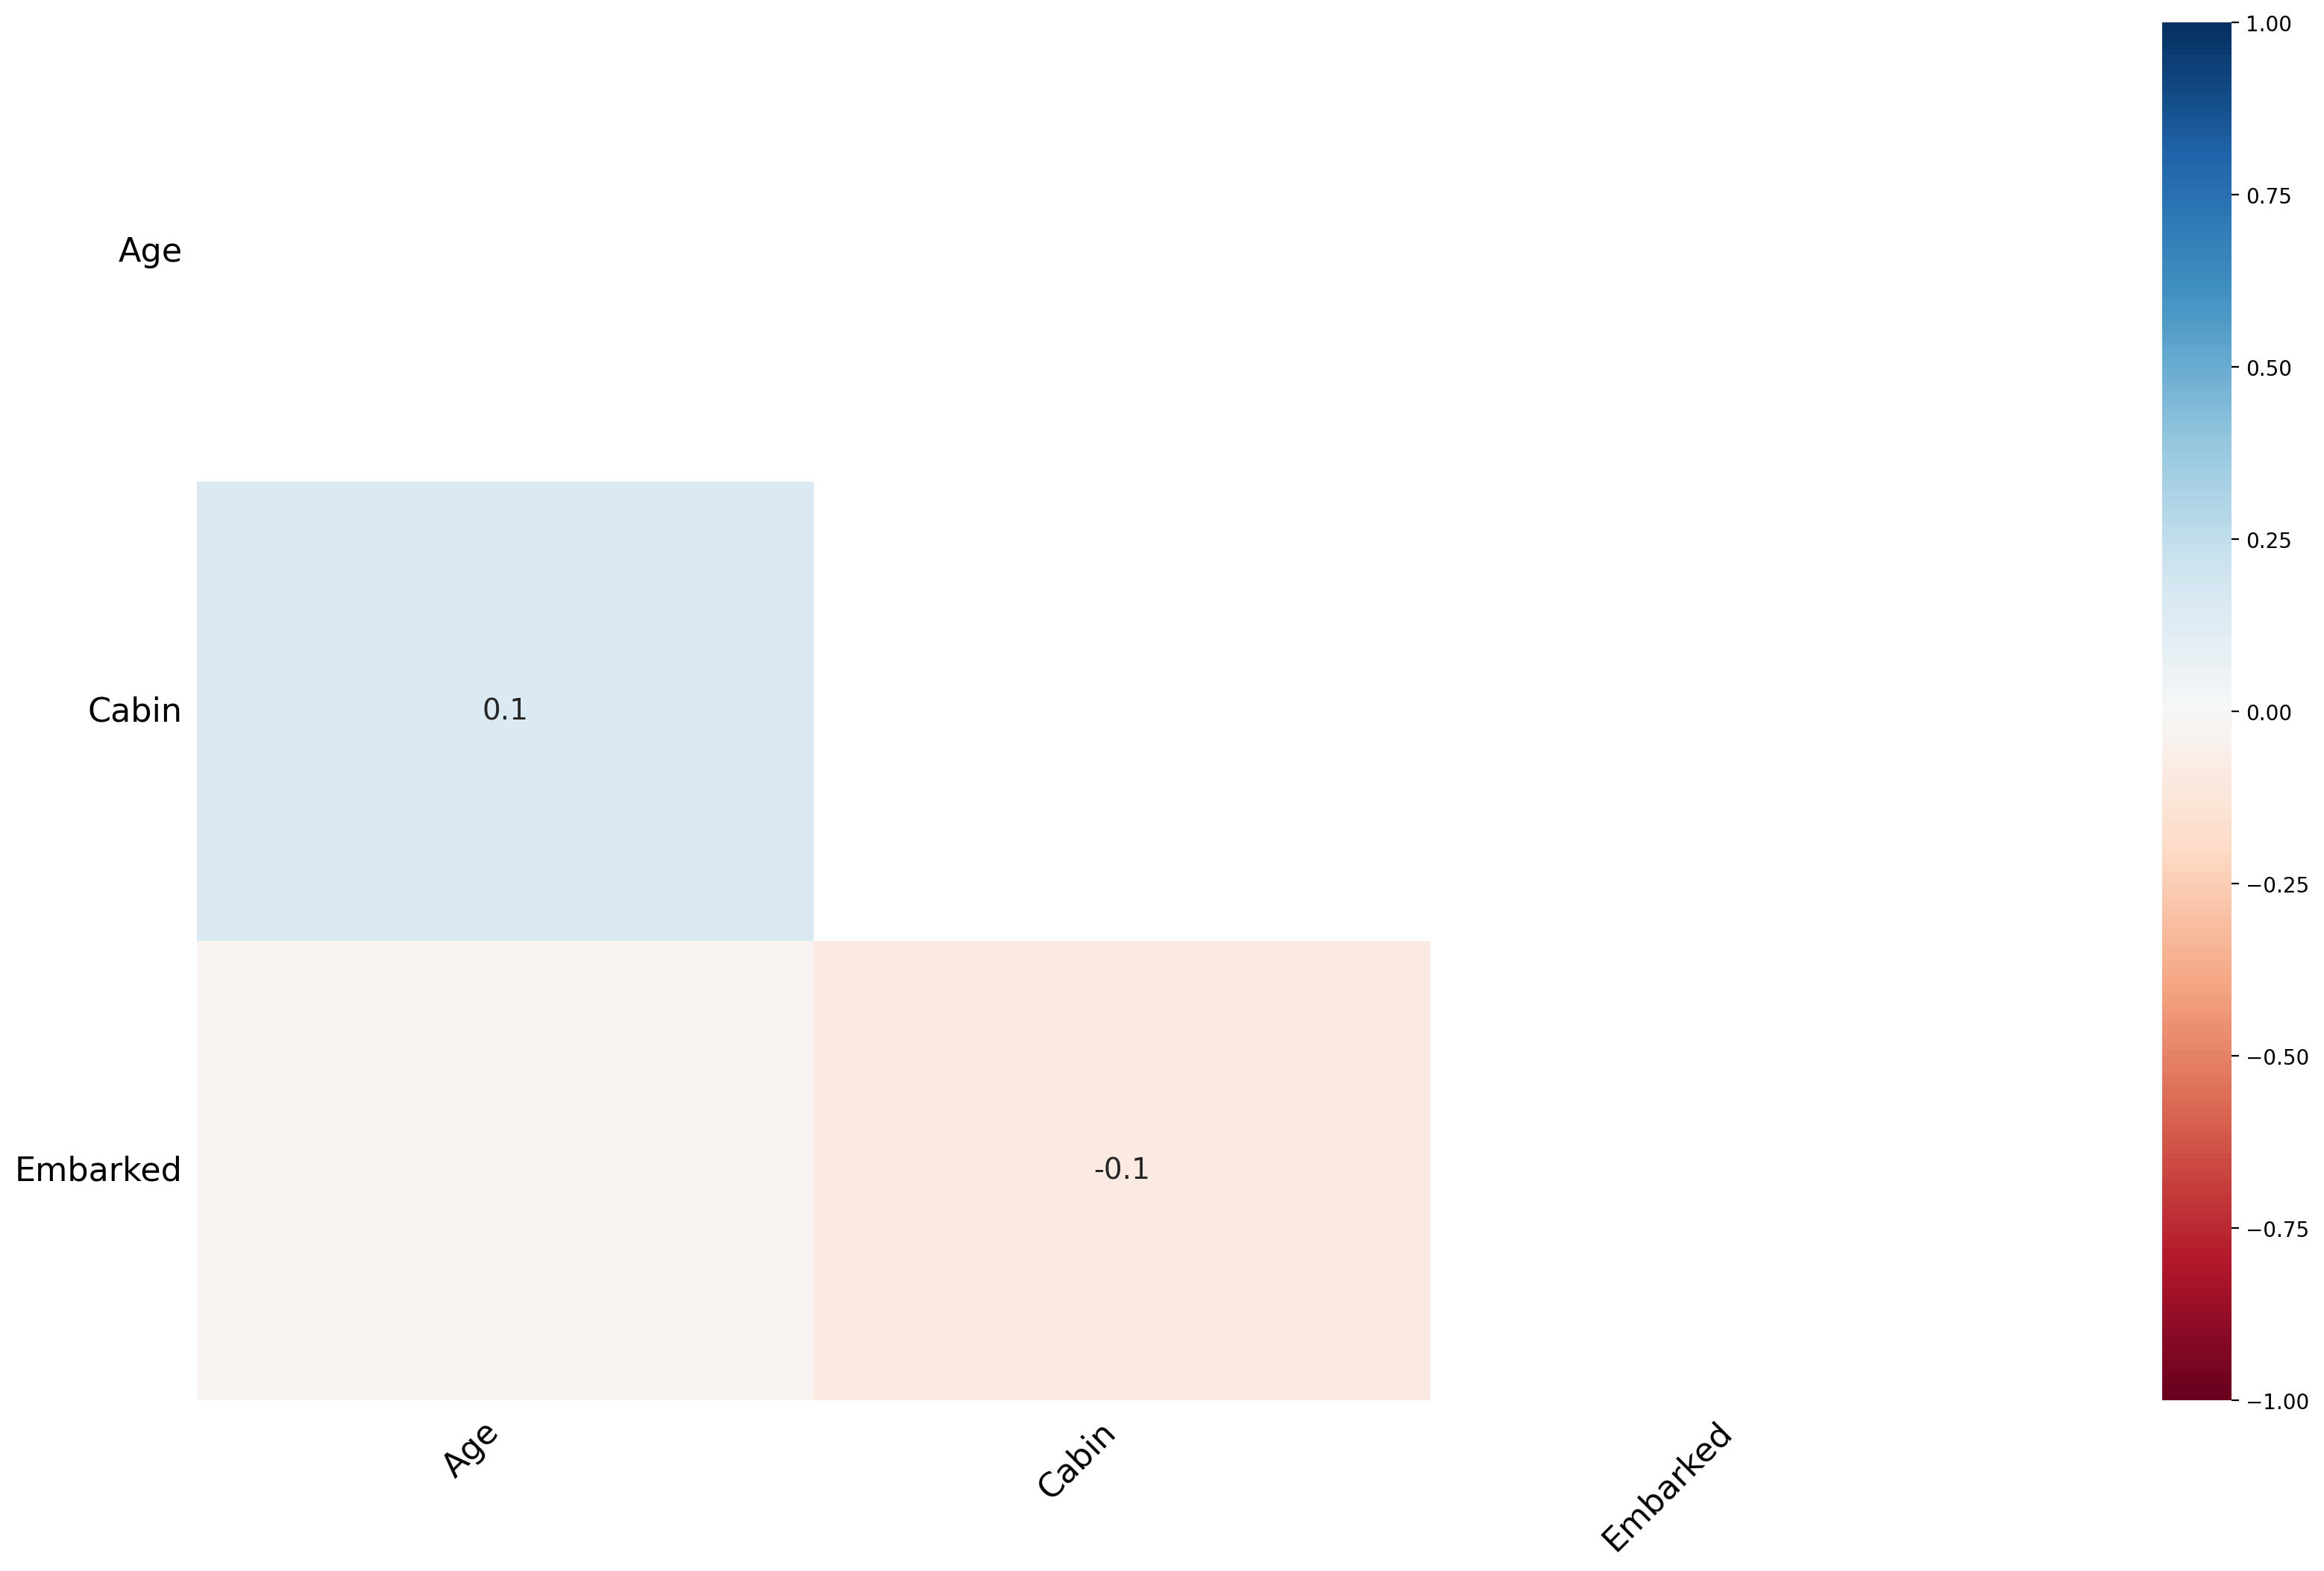

In [5]:
msno.heatmap(df_titanic);

The heat map feature shows that there are no strong correlations between missing values ​​of different features. This is good; low correlations also indicate that the data is MAR.

## Finding the Cause of Missing Data Using a Dendrogram

A dendrogram is a tree diagram of missing data. It groups together highly correlated variables.

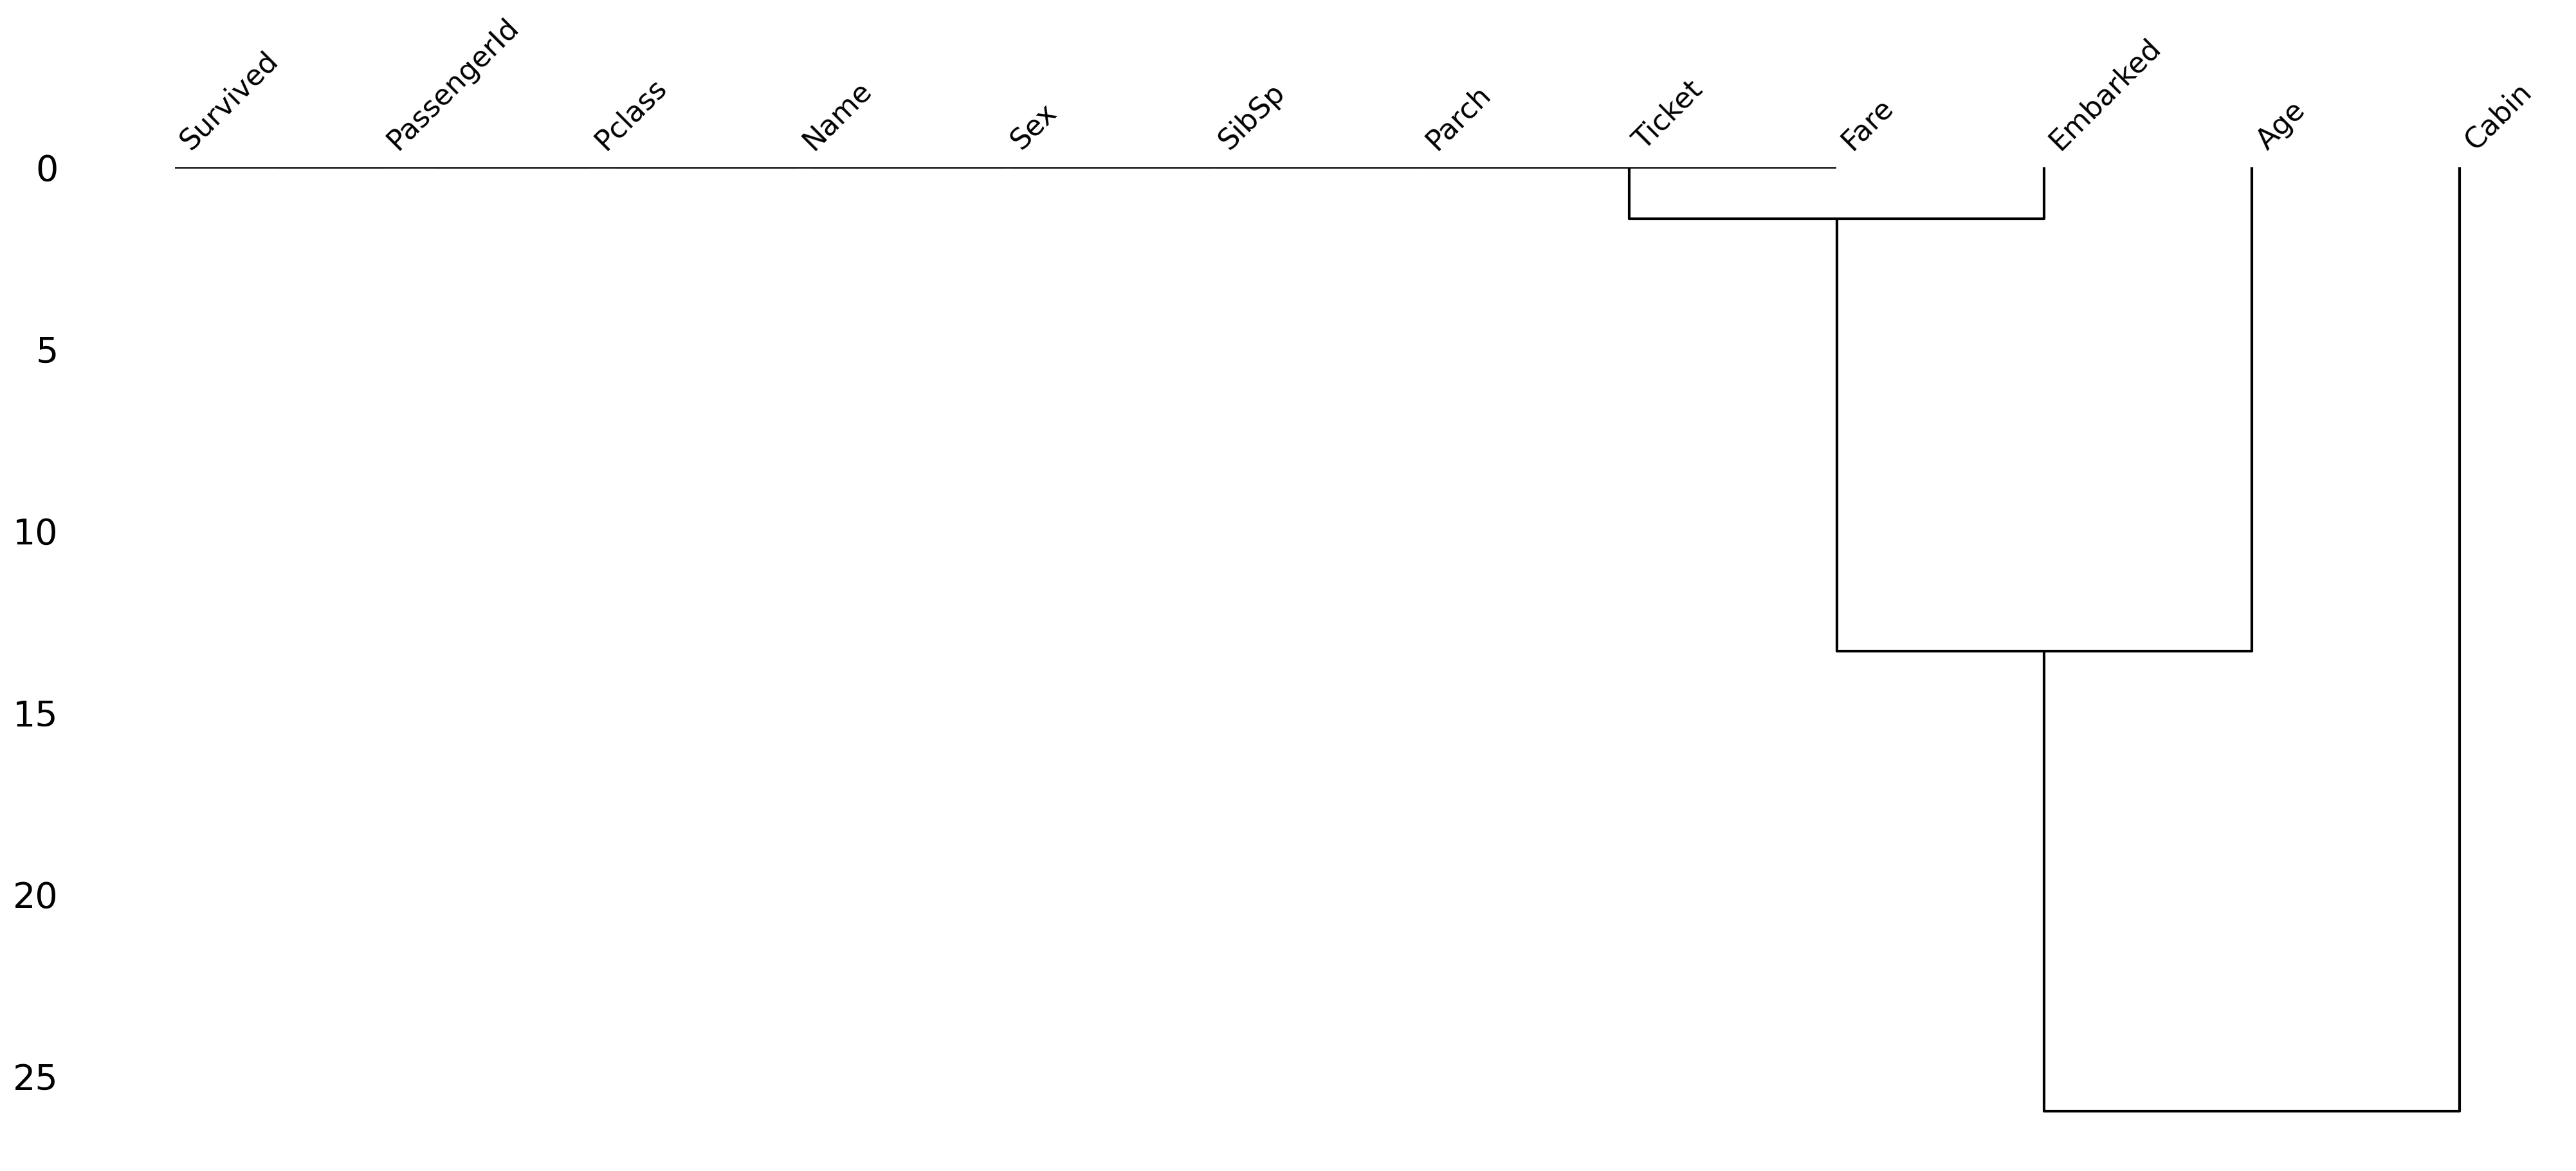

In [6]:
msno.dendrogram(df_titanic);

### Step 3: Determine what to do!

Having *identified* missing data, you need to determine how to *handle it*.

There are several approaches you can take.

- **Removing** all rows with *any* missing data. 
- **Removing** rows with missing data only when that variable is relevant to the analysis or visualization.
- **Imputing** (i.e., guessing) what values missing data should have.

#### Removing all rows with any missing data

- We can *filter* our `DataFrame` using `dropna`, which will automatically "drop" any rows containing null values.  
- Caution: if you have lots of missing data, this can substantially impact the size of your dataset.

In [43]:
df_filtered = df_titanic.dropna()
df_filtered.shape

(183, 13)

#### Removing all rows with missing data in specific columns

- Here, we specify that we only want to `dropna` for rows that have `nan` in the `Age` column specifically.  
- We still have missing `nan` for `Cabin`, but perhaps that's fine in our case.

In [44]:
df_filtered = df_titanic.dropna(subset = "Age")
df_filtered.shape

(714, 13)

#### Imputing missing data

One of the most complex (and controversial) approaches is to *impute* the values of missing data. 

There are (again) multiple ways to do this:

1. Decide on a **constant** value and assign it to all `nan` values.
   - E.g., assign the `mean` `Age` to all people with `nan` in that column.
2. Try to **guess** the value based on specific characteristics of the data.
   - E.g., based on other characteristics of this person, what is their likely `Age`?
  

##### Imputing a constant value

We can use `fillna` to assign all values with `nan` for `Age` some other value.

In [54]:
## Assign the mean Age to all people with nan for Age
df_titanic['Age_imputed1'] = df_titanic['Age'].fillna(df_titanic['Age'].mean())
## Now let's look at those rows
df_titanic[df_titanic['Age'].isna()].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_na,Age_imputed,Age_imputed1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,True,28.0,29.699118
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,True,28.0,29.699118
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,True,28.0,29.699118
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,True,28.0,29.699118
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,True,28.0,29.699118


##### Guessing based on other characteristics

- You can try to *guess* what their `Age` would be, based on other features.
- The more sophisticated version of this is to use **statistical modeling** or using `SimpleImputer` from the `sklearn` library.  
- For now, simply note that `Age` correlates with other features (like `Pclass`).

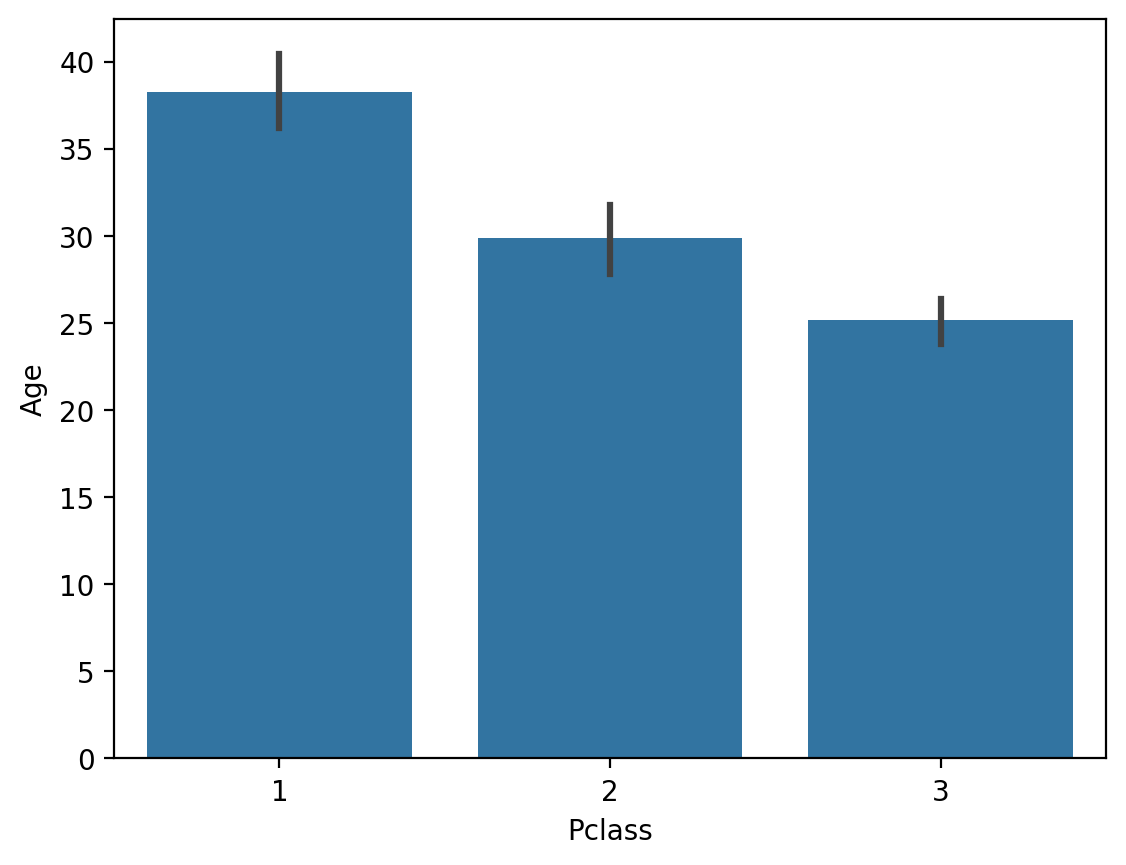

In [7]:
## Passenger Class is correlated with Age
sns.barplot(data = df_titanic, x = 'Pclass', y = 'Age');

#### Check-in

What would happen if you used `fillna` with the `median` `Age` instead of the `mean`? Why would this matter?

In [56]:
### Your code here

#### Solution

The `median` `Age` is slightly lower.

In [57]:
## Assign the median Age to all people with nan for Age
df_titanic['Age_imputed2'] = df_titanic['Age'].fillna(df_titanic['Age'].median())
## Now let's look at those rows
df_titanic[df_titanic['Age'].isna()].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_na,Age_imputed,Age_imputed1,Age_imputed2
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,True,28.0,29.699118,28.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,True,28.0,29.699118,28.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,True,28.0,29.699118,28.0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,True,28.0,29.699118,28.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,True,28.0,29.699118,28.0


## Random imputation/hot deck

Hot deck imputation is a method in which each missing value is replaced with a value from a similar record in the dataset, often referred to as the “donor.” The donor record is selected based on matching criteria—such as demographic characteristics or proximity in a multidimensional feature space—to ensure that the imputation preserves the inherent distribution and relationships in the data.

For example, if income data for a survey respondent are missing, the income value of a similar respondent (based on factors such as occupation, geographic location, and education level) is used as a surrogate.

Hot deck imputation is crucial to maintaining the integrity of the dataset. It ensures that:

- Statistical analyses are not biased by the arbitrary or discarded incomplete cases.

- Natural variability and distributional patterns present in complete cases are preserved.

- Comparisons between different groups within the data remain feasible and valid.

**Hot Deck Random Imputation**: In this method, missing values ​​are imputed by randomly selecting a donor from a pool of potential candidates. This preserves the distribution of the data, especially when the missing values ​​are random. The downside is that the randomness can overlook nuances in the data.

**Hot Deck Nearest Neighbor Imputation**: In this case, a donor is selected based on the similarity of observed features. A commonly used algorithm is the k-nearest neighbors (k-NN) approach, which calculates a distance metric between observations. For a record with a missing value, its k nearest neighbors (in terms of Euclidean or Mahalanobis distance) are determined, and one of their values ​​is used for imputation.

The k-NN algorithm identifies the closest records that minimize the distance:

$d(x, y) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}$

where:
- $(x)$ and $(y)$ are two points in n-dimensional space,
- $(x_i)$ and $(y_i)$ are the coordinates of points $(x)$ and $(y)$ in dimension $(i)$,
- $d(x, y)$ is the [Euclidean distance](https://pl.wikipedia.org/wiki/Distance) between points $(x)$ and $(y)$.

Hot Deck imputation offers several advantages over other methods:

1. **Mean/Median Imputation**: Unlike simply replacing missing values ​​with the grand mean or median, Hot Deck imputation uses information from similar cases. This preserves local variability and takes into account relationships between variables.

2. **Regression Imputation**: While regression imputation relies on predictive models to estimate missing values, it can lead to biased estimates if model assumptions are violated. Hot Deck imputation, on the other hand, borrows directly from observed values, often making it more robust under different conditions.

3. **Multiple Imputation**: Multiple imputation creates multiple imputed data sets and combines the results for a final analysis, accounting for imputation uncertainty. Although it is often more statistically sophisticated, it can be computationally expensive. Hot Deck imputation remains a practical choice when maintaining ease of interpretation and computational efficiency are priorities.

The main conclusion is that **Hot Deck imputation offers an intuitive, practically feasible approach that still respects the statistical properties of the data**.

### Hot-deck Random Imputation

In [14]:
# Hot Deck Random Imputation Example
def random_hot_deck_imputation(df, column):
    # We filter non-null values
    non_null_values = df[column].dropna().values
    # We replace NaN with a random value from the existing ones
    df[column] = df[column].apply(lambda x: np.random.choice(non_null_values) if pd.isna(x) else x)
    return df

# Imputation for 'Age' column
df_titanic = random_hot_deck_imputation(df_titanic, 'Age')
df_titanic.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

### Hot Deck Nearest Neighbor (k-NN) Imputation

In [15]:
from sklearn.impute import KNNImputer

# We create a KNNImputer object
knn_imputer = KNNImputer(n_neighbors=5)  # You can change the number of neighbors

# We select numeric columns for imputation
columns_to_impute = ['Age', 'Fare']  # Columns
df_titanic[columns_to_impute] = knn_imputer.fit_transform(df_titanic[columns_to_impute])

df_titanic.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

### Summary

1. Hot Deck Random Imputation:

- NaN values ​​in a column are replaced with a random value from existing data in the same column.
- It is fast but may introduce randomness that does not take into account the relationships between variables.

2. Hot Deck Nearest Neighbor Imputation (k-NN):

- The k-NN algorithm uses other features (e.g. Pclass, Fare) to find similar records and impute missing values.
- It is more advanced and takes into account the relationships between variables.

## Dirty Data

Many times we spend hours troubleshooting missing values, logical inconsistencies, or outliers in our datasets. In this tutorial, we will discuss the most popular data cleaning techniques.

We will work with the unstructured iris dataset. Originally published in the UCI Machine Learning Repository: Iris Data Set, this small dataset from 1936 is often used to test machine learning algorithms and visualizations. Each row of the table represents an iris flower, including its species and the dimensions of its botanical parts, sepal and petal, in centimeters.

Check out this dataset here:

In [16]:
dirty_iris = pd.read_csv("data/dirty_iris.csv")
dirty_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica


Coherent data are technically correct data that are suitable for statistical analysis. They are data in which missing values, special values, (obvious) errors, and outliers have been removed, corrected, or imputed. The data conform to constraints based on actual knowledge about the subject that the data describes.

![title](img/iris.png)

We have the following basic knowledge:

- The species should be one of the following values: setosa, versicolor, or virginica.

- All measured numerical properties of the iris should be positive.

- The length of an iris petal is at least 2 times its width.

- The length of an iris sepal cannot exceed 30 cm.

- The sepals of the iris are longer than its petals.

We will now define these rules in a separate "RULES" object and read them into Python. We will print the resulting constraint object:

In [17]:
# We define rules as functions:
def check_rules(df):
    rules = {
        "Sepal.Length <= 30": df["Sepal.Length"] <= 30,
        "Species in ['setosa', 'versicolor', 'virginica']": df["Species"].isin(['setosa', 'versicolor', 'virginica']),
        "Sepal.Length > 0": df["Sepal.Length"] > 0,
        "Sepal.Width > 0": df["Sepal.Width"] > 0,
        "Petal.Length > 0": df["Petal.Length"] > 0,
        "Petal.Width > 0": df["Petal.Width"] > 0,
        "Petal.Length >= 2 * Petal.Width": df["Petal.Length"] >= 2 * df["Petal.Width"],
        "Sepal.Length > Petal.Length": df["Sepal.Length"] > df["Petal.Length"]
    }
    return rules

# Data frame rules:
rules = check_rules(dirty_iris)

# Print:
for rule, result in rules.items():
    print(f"{rule}: {result.all()}")

Sepal.Length <= 30: False
Species in ['setosa', 'versicolor', 'virginica']: True
Sepal.Length > 0: False
Sepal.Width > 0: False
Petal.Length > 0: False
Petal.Width > 0: False
Petal.Length >= 2 * Petal.Width: False
Sepal.Length > Petal.Length: False


Now we can determine how often each rule is broken (violations). We can also summarize and plot the result.

In [18]:
# We check for rule violations:
violations = {rule: ~result for rule, result in rules.items()}

# We summarize them:
summary = {rule: result.sum() for rule, result in violations.items()}

# Print:
print("Summary of Violations:")
for rule, count in summary.items():
    print(f"{rule}: {count} violations")

Summary of Violations:
Sepal.Length <= 30: 12 violations
Species in ['setosa', 'versicolor', 'virginica']: 0 violations
Sepal.Length > 0: 11 violations
Sepal.Width > 0: 19 violations
Petal.Length > 0: 20 violations
Petal.Width > 0: 12 violations
Petal.Length >= 2 * Petal.Width: 34 violations
Sepal.Length > Petal.Length: 30 violations


What percentage of % of data has errors?

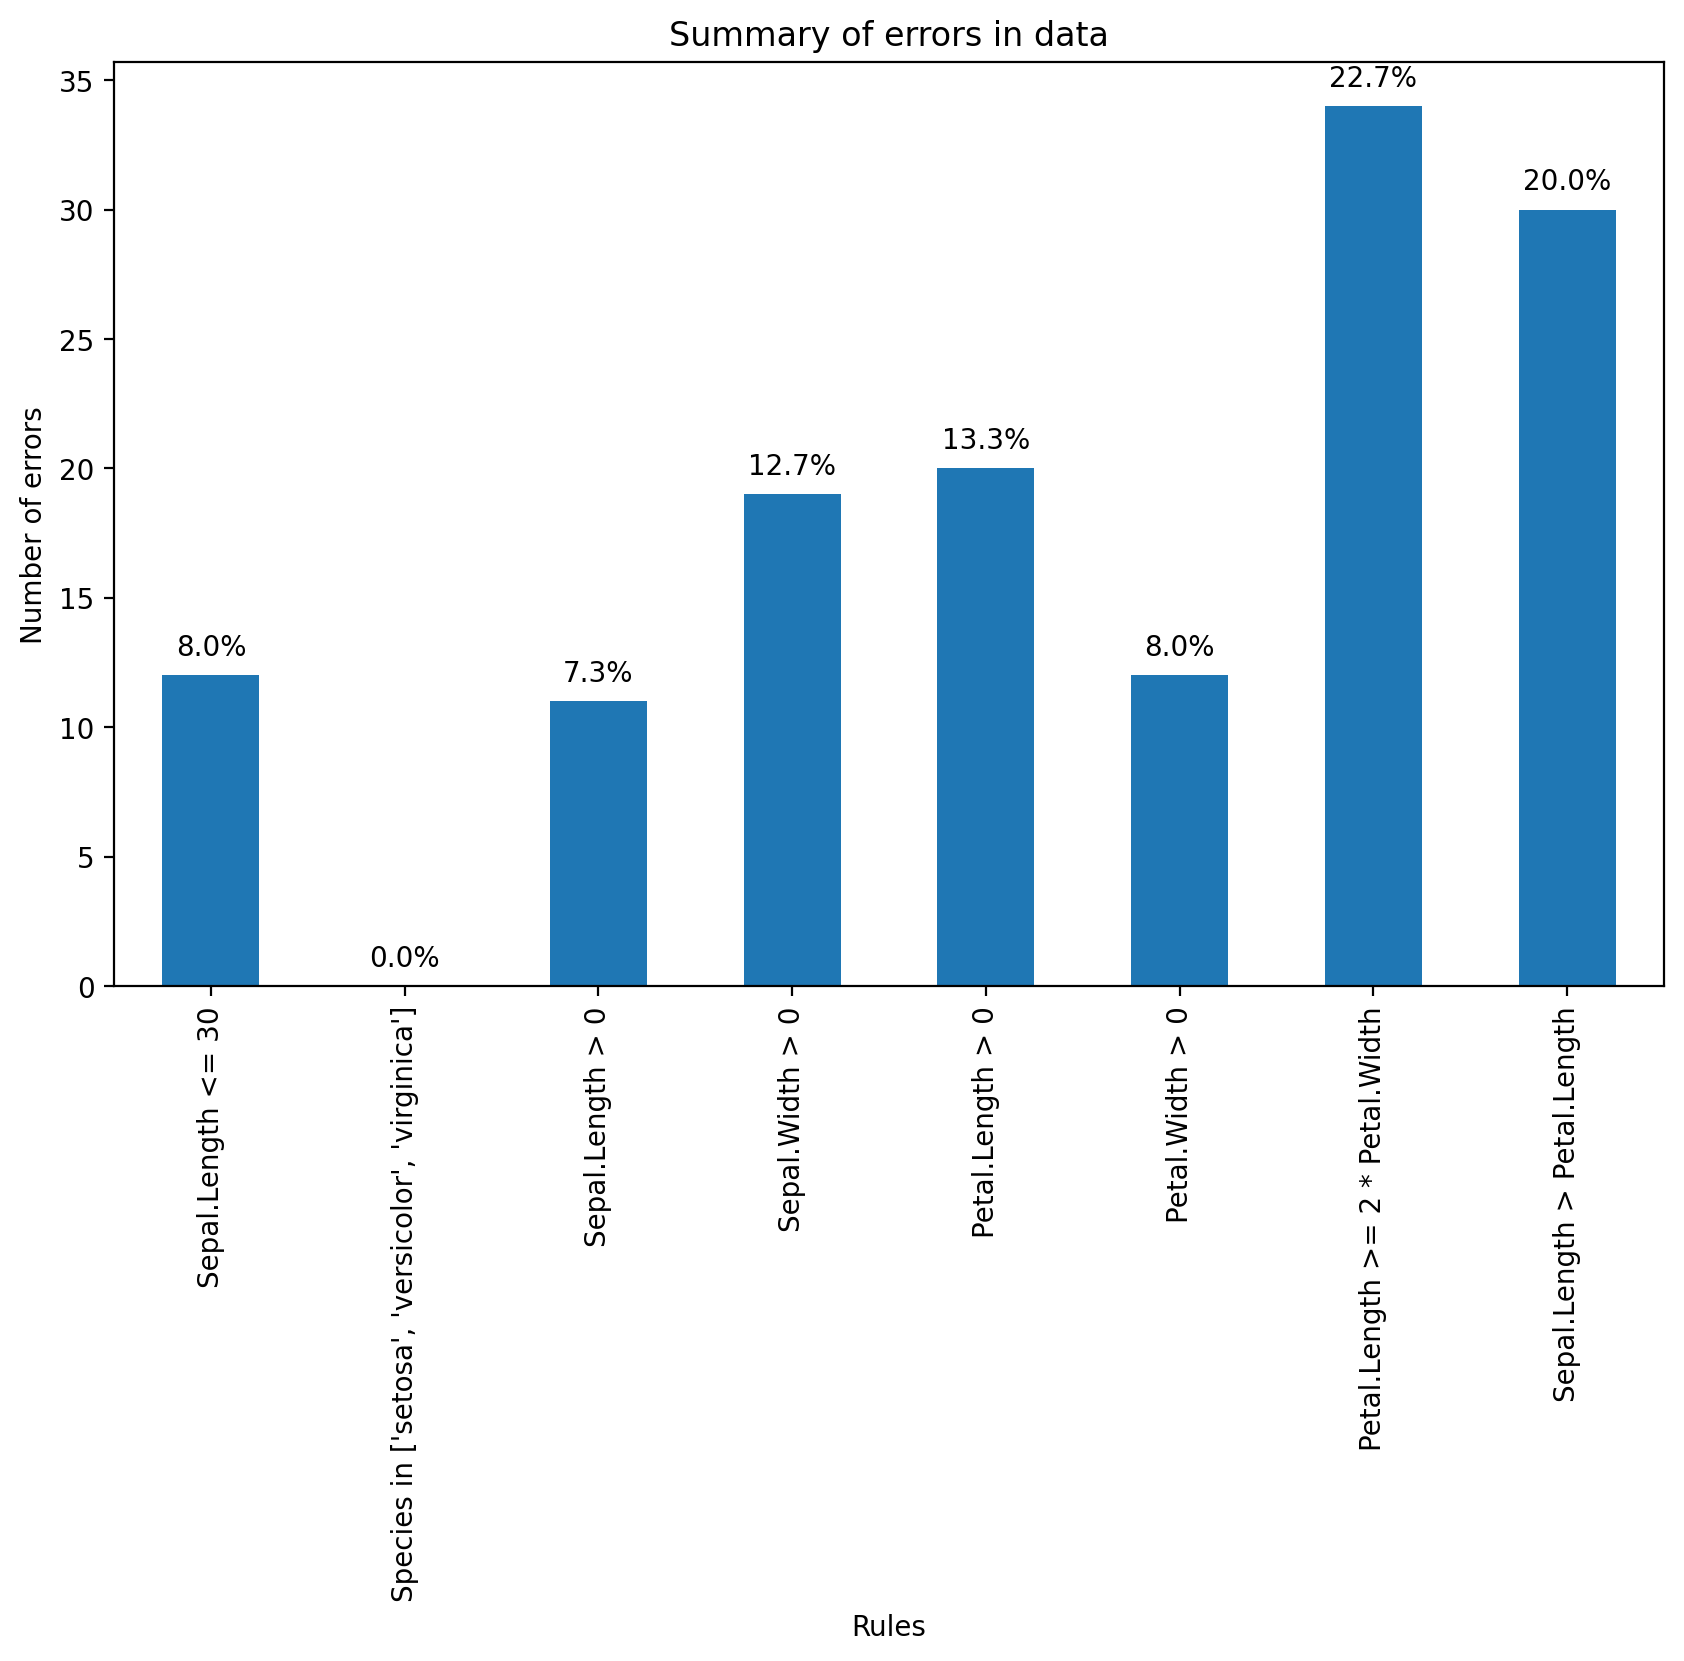

In [19]:
import matplotlib.pyplot as plt
# Violation Chart:
violation_counts = pd.Series(summary)
ax = violation_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Summary of errors in data')
plt.xlabel('Rules')
plt.ylabel('Number of errors')

# I add the percentages above the bars:
for p in ax.patches:
    ax.annotate(f'{p.get_height() / len(dirty_iris) * 100:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')

plt.show()

Find which flowers have sepals that are too long using the violation results.

In [20]:
violations = {rule: ~result for rule, result in rules.items()}
violated_df = pd.DataFrame(violations)
violated_rows = dirty_iris[violated_df["Sepal.Length <= 30"]]
print(violated_rows)

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
14            NaN          3.9          1.70          0.4      setosa
18            NaN          4.0           NaN          0.2      setosa
24            NaN          3.0          5.90          2.1   virginica
27           73.0         29.0         63.00          NaN   virginica
29            NaN          2.8          0.82          1.3  versicolor
57            NaN          2.9          4.50          1.5  versicolor
67            NaN          3.2          5.70          2.3   virginica
113           NaN          3.3          5.70          2.1   virginica
118           NaN          3.0          5.50          2.1   virginica
119           NaN          2.8          4.70          1.2  versicolor
124          49.0         30.0         14.00          2.0      setosa
137           NaN          3.0          4.90          1.8   virginica


Let's find outliers in the plot length using the boxplot method.

We'll take the relevant observations and check the remaining values.

Any ideas what might have happened?

We'll set outliers to NA (or whatever value you think is more appropriate).

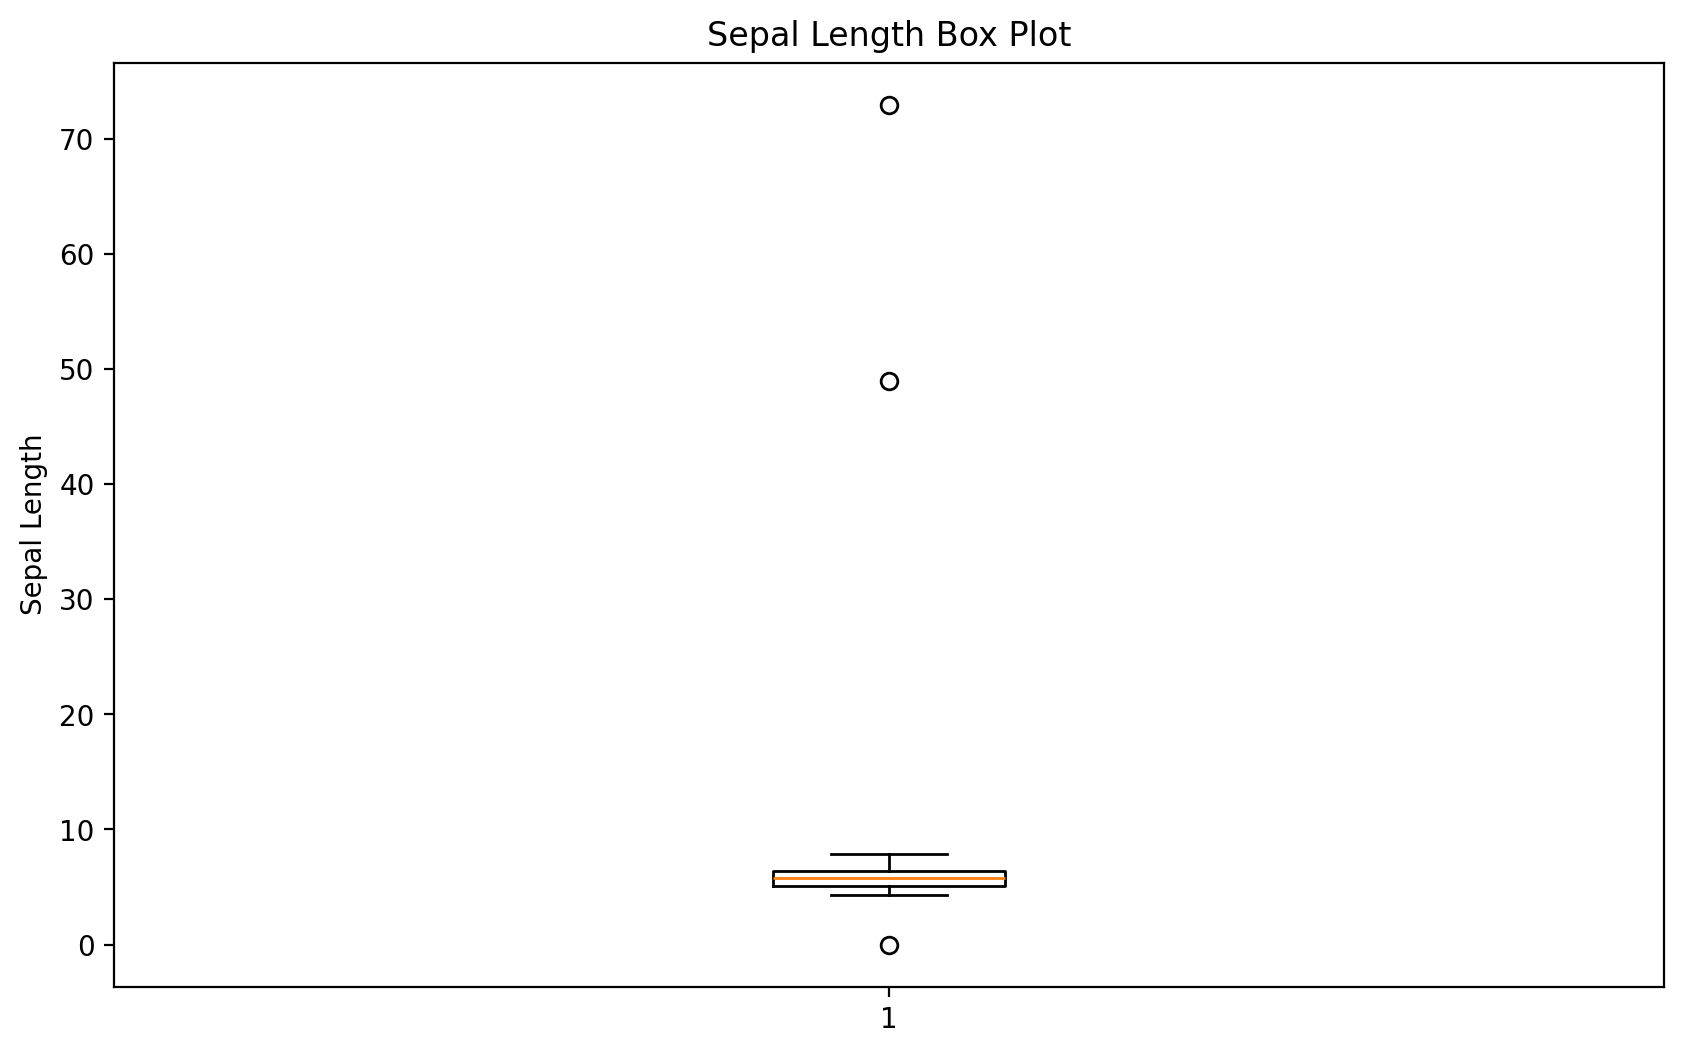

In [21]:
plt.figure(figsize=(10, 6))
plt.boxplot(dirty_iris['Sepal.Length'].dropna())
plt.title('Sepal Length Box Plot')
plt.ylabel('Sepal Length')
plt.show()

In [22]:
# We will find outliers:
outliers = dirty_iris['Sepal.Length'][np.abs(dirty_iris['Sepal.Length'] - dirty_iris['Sepal.Length'].mean()) > (1.5 * dirty_iris['Sepal.Length'].std())]
outliers_idx = dirty_iris.index[dirty_iris['Sepal.Length'].isin(outliers)]

# We will print them:
print("Outliers:")
print(dirty_iris.loc[outliers_idx])

Outliers:
     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
27           73.0         29.0          63.0          NaN  virginica
124          49.0         30.0          14.0          2.0     setosa


They all seem too big... maybe they were measured in mm instead of cm?

In [23]:
# We will correct outliers (assuming they were measured in mm instead of cm).
dirty_iris.loc[outliers_idx, ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']] /= 10

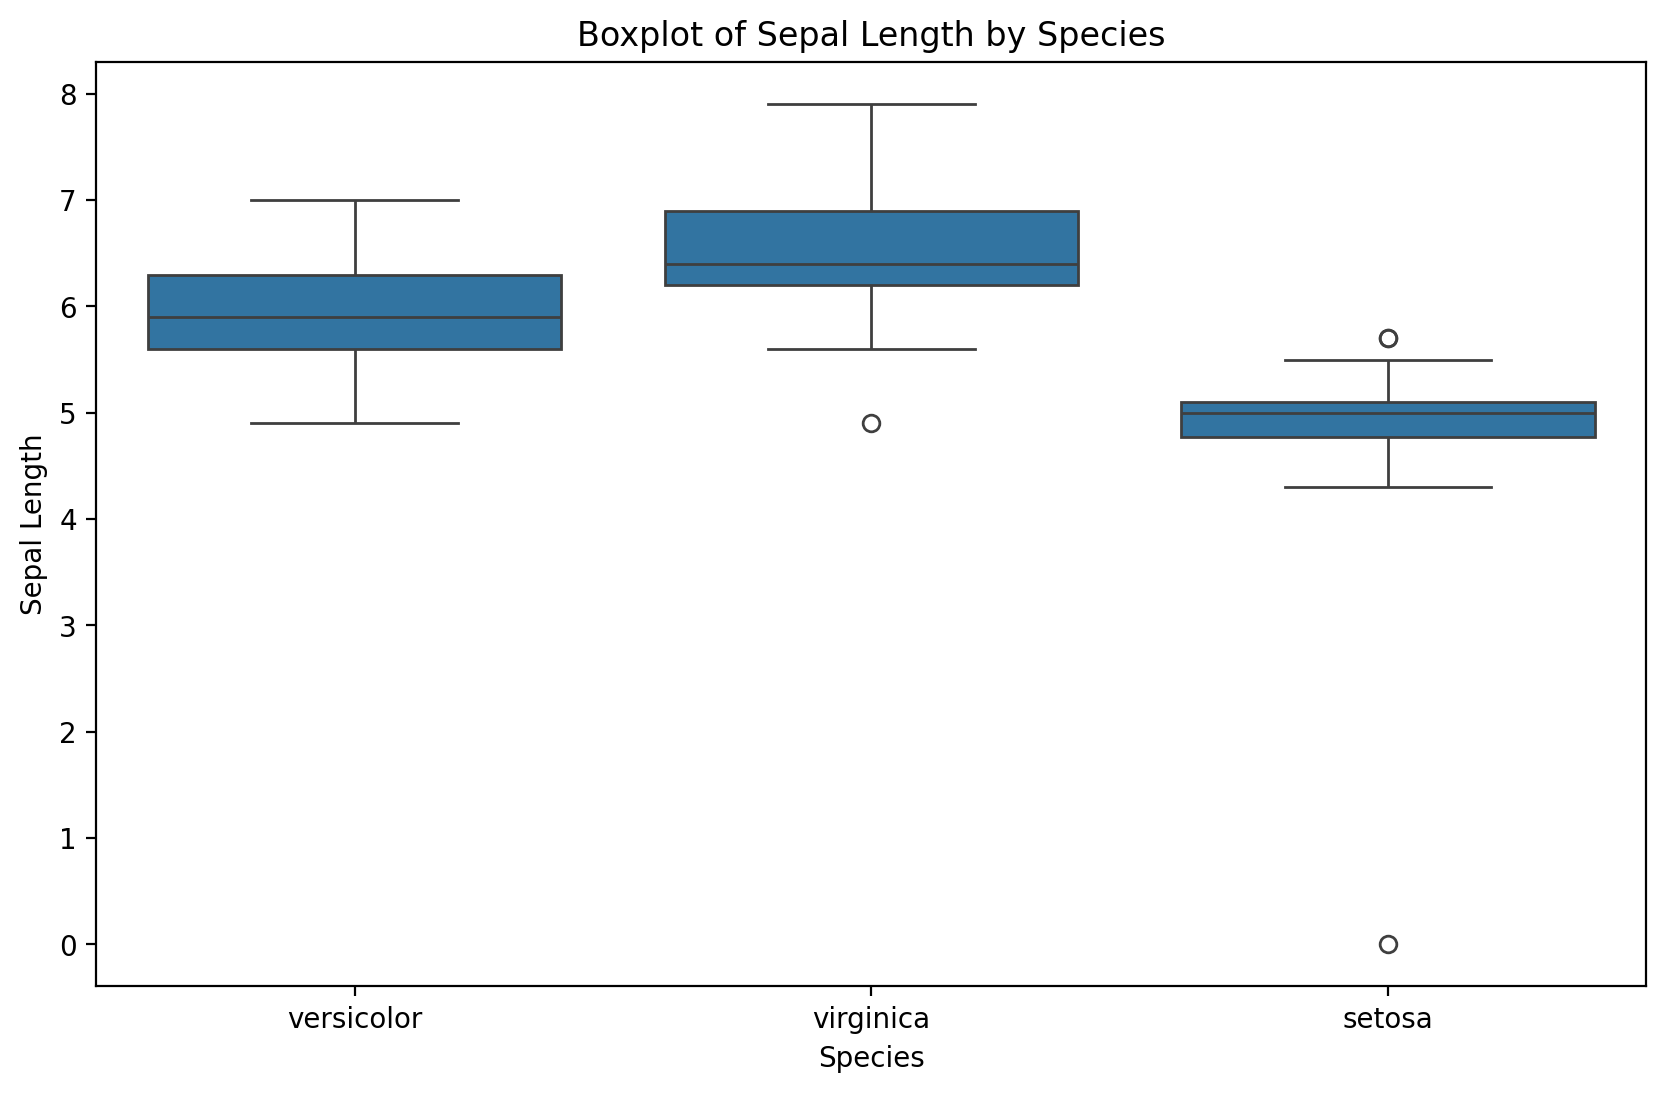

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='Sepal.Length', data=dirty_iris)
plt.title('Boxplot of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.show()

Notice that the simple boxplot shows an additional outlier!

## Error Correction

Let's replace non-positive values ​​from Sepal.Width with NA:

In [25]:
# We define the correction rule:
def correct_sepal_width(df):
    df.loc[(~df['Sepal.Width'].isna()) & (df['Sepal.Width'] <= 0), 'Sepal.Width'] = np.nan
    return df

# We apply correction to the data frame:
mydata_corrected = correct_sepal_width(dirty_iris)

# and let's look at the data:
print(mydata_corrected)

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
0             6.4          3.2           4.5          1.5  versicolor
1             6.3          3.3           6.0          2.5   virginica
2             6.2          NaN           5.4          2.3   virginica
3             5.0          3.4           1.6          0.4      setosa
4             5.7          2.6           3.5          1.0  versicolor
..            ...          ...           ...          ...         ...
145           6.7          3.1           5.6          2.4   virginica
146           5.6          3.0           4.5          1.5  versicolor
147           5.2          3.5           1.5          0.2      setosa
148           6.4          3.1           NaN          1.8   virginica
149           5.8          2.6           4.0          NaN  versicolor

[150 rows x 5 columns]


**Replacing all error values ​​with NA:**

In [26]:
# we apply rules for violations (errors):
rules = check_rules(dirty_iris)
violations = {rule: ~result for rule, result in rules.items()}
violated_df = pd.DataFrame(violations)

# we locate errors and change them to NA:
for col in violated_df.columns:
    dirty_iris.loc[violated_df[col], col.split()[0]] = np.nan

Better to have NA before errors in data. One could possibly attempt to impute newly created gaps now...

## Merging datasets

> **Merging** refers to *combining* different datasets to leverage the power of additional information.

- In Week 1, we discussed this in the context of **data linkage**. 
- Can link datasets as a function of:
   - Shared *time window*. 
   - Shared *identity*.

### Why merge?

- Each dataset contains *limited* information.
   - E.g., `GDP` by `Year`. 
- But **merging** datasets allows us to see how more variables relate and interact.
- Much of social science research involves **locating** datasets and figuring out how to **combine** them.

### How to merge?

In Python, `pandas.merge` allows us to merge two `DataFrame`s on a common column(s).

```python
pd.merge(df1, df2, on = "shared_column")
```

### `merge` in practice

For demonstration, we'll merge two Linguistics datasets:

- One dataset contains information about the **Age of Acquisition** of different English words (Kuperman et al., 2014).
- The other dataset contains information about the **Frequency** and **Concreteness** of English words (Brysbaert et al., 2014).

#### Loading datasets

In [29]:
df_aoa = pd.read_csv("data/wrangling/AoA.csv")
df_aoa.head(1)

,Word,AoA
0,a,2.89


In [30]:
df_conc = pd.read_csv("data/wrangling/concreteness.csv")
df_conc.head(1)

,Word,Concreteness,Frequency,Dom_Pos
0,sled,5.0,149,Adjective


#### Different *kinds* of merging

As we see, the datasets are not the same **size**. This leaves us with a decision to make when merging.

- `inner` join: Do we preserve only the words in *both* datasets?
- `left` join: Do we preserve all the words in one dataset (the "left" one), regardless of whether they occur in the other?
- `right` join: Do we preserve all the words in one dataset (the "right" one), regardless of whether they occur in the other?
- `outer` join: Do we preserve all words in both, leaving empty (`nan`) values where a word only appears in one dataset?

In [31]:
df_aoa.shape

(31124, 2)

In [32]:
df_conc.shape

(28612, 4)

#### `inner` join

- For our purposes, it makes the most sense to use an `inner` join.
- This leaves us with fewer words than occur in *either* dataset.

In [33]:
df_merged = pd.merge(df_aoa, df_conc, on = "Word", how = "inner")
df_merged.head(2)

,Word,AoA,Concreteness,Frequency,Dom_Pos
0,aardvark,9.89,4.68,21,Noun
1,abacus,8.69,4.52,12,Noun


In [34]:
df_merged.shape

(23569, 5)

#### Check-in

What happens if you use a different kind of join, e.g., `outer` or `left`? What do you notice about the `shape` of the resulting `DataFrame`? Do some rows have `nan` values?

In [29]:
### Your code here

#### Solution

In [35]:
df_outer_join = pd.merge(df_aoa, df_conc, on = "Word", how = "outer")
df_outer_join.shape

(36167, 5)

In [36]:
df_outer_join.head(4)

,Word,AoA,Concreteness,Frequency,Dom_Pos
0,Armageddon,11.83,NaN,NaN,NaN
1,FALSE,6.72,2.36,1078.0,Adjective
2,I,2.79,3.93,2038529.0,Pronoun
3,Masonic,12.33,NaN,NaN,NaN


### Why `merge` is so useful

Now that we've merged our datasets, we can look at how variables *across* them relate to each other.

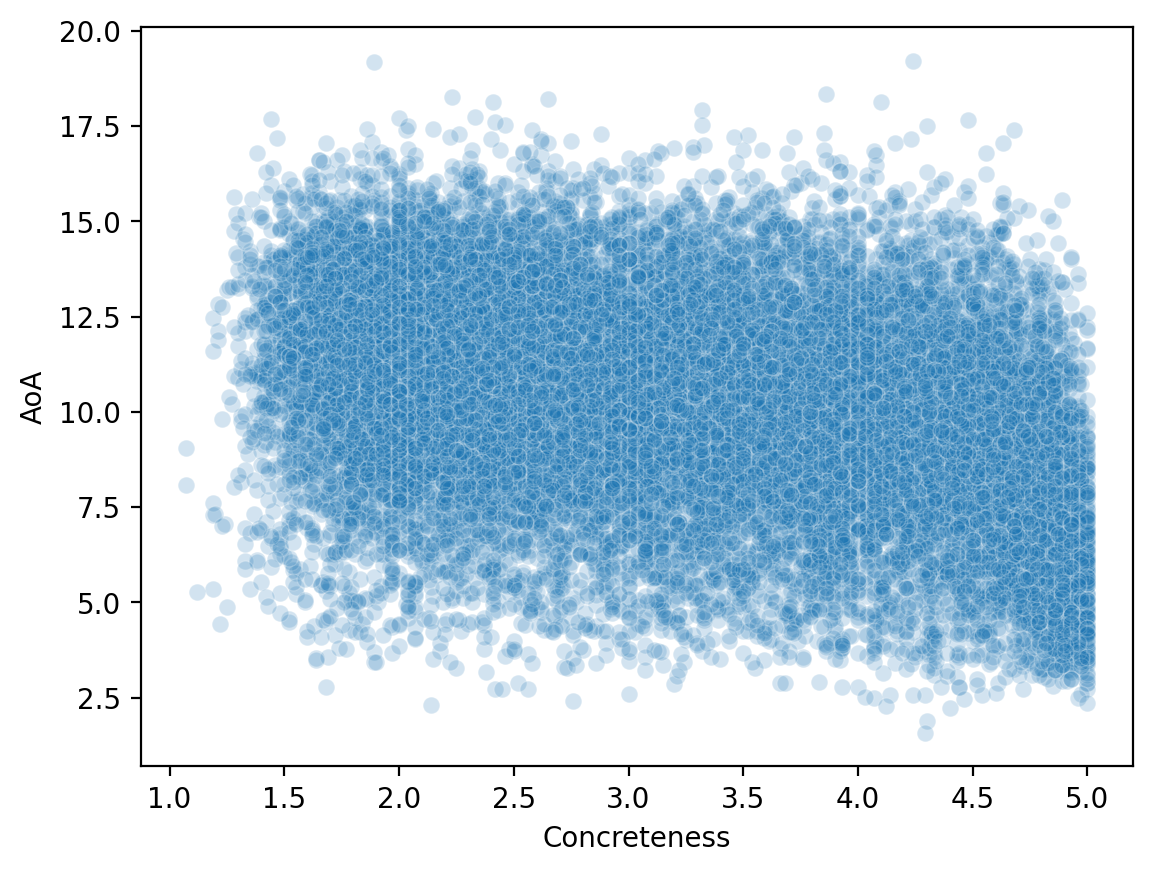

In [37]:
sns.scatterplot(data = df_merged, x = 'Concreteness',
                y = 'AoA', alpha = .2 );

## Reshaping data

> **Reshaping data** involves transforming it from one format (e.g., "wide") to another format (e.g., "long"), to make it more amenable to visualization and analysis.

Often, we need to make our data **tidy**.

### What is tidy data?

**Tidy data** is a particular way of formatting data, in which:

1. Each variable forms a column (e.g., `GDP`).
2. Each observation forms a row (e.g., a `country`).
3. Each type of observational unit forms a table (**tabular data**!).

Originally developed by Hadley Wickham, creator of the `tidyverse` in R.

### Tidy vs. "untidy" data

Now let's see some examples of **tidy** vs. **untidy** data.

Keep in mind:

- These datasets all contain the **same information**, just in different **formats**.
- "Untidy" data can be useful for other things, e.g., presenting in a paper.
- The key goal of tidy data is that **each row represents an observation**.

#### Tidy data

**Check-in**: Why is this data considered tidy?

In [38]:
df_tidy = pd.read_csv("data/wrangling/tidy.csv")
df_tidy

,ppt,condition,rt
0,john,Congruent,200
1,john,Incongruent,250
2,mary,Congruent,178
3,mary,Incongruent,195


#### Untidy data 1

**Check-in**: Why is this data *not* considered tidy?

In [39]:
df_messy1 = pd.read_csv("data/wrangling/messy1.csv")
df_messy1

,john,mary,condition
0,200,178,Congruent
1,250,195,Incongruent


#### Untidy data 2

**Check-in**: Why is this data *not* considered tidy?

In [40]:
df_messy2 = pd.read_csv("data/wrangling/messy2.csv")
df_messy2

,congruent,incongruent,ppt
0,200,250,john
1,178,195,mary


### Making data tidy

Fortunately, `pandas` makes it possible to turn an "untidy" `DataFrame` into a **tidy** one.

The key function here is `pandas.melt`.

```python
pd.melt(df, ### Dataframe
        id_vars = [...], ### what are the identifying columns?
        var_name = ..., ### name for variable grouping over columns
        value_name = ..., ### name for the value this variable takes on
```

If this seems **abstract**, don't worry––it'll become clearer with examples!


#### Using `pd.melt`

- Let's start with our first messy `DataFrame`.
- Has columns for each `ppt`, which contain info about `rt`.

In [41]:
df_messy1

,john,mary,condition
0,200,178,Congruent
1,250,195,Incongruent


In [42]:
pd.melt(df_messy1, id_vars = 'condition', ### condition is our ID variable
       var_name = 'ppt', ### new row for each ppt observation
       value_name = 'rt') ### label for the info we have about each ppt

,condition,ppt,rt
0,Congruent,john,200
1,Incongruent,john,250
2,Congruent,mary,178
3,Incongruent,mary,195


#### Check-in

Try to use `pd.melt` to turn `df_messy2` into a **tidy** `DataFrame`.

**Hint**: Think about the existing structure of the `DataFrame`––how is data grouped––and what the `id_vars` would be.

In [43]:
df_messy2

,congruent,incongruent,ppt
0,200,250,john
1,178,195,mary


In [61]:
### Your code here

#### Solution

In [44]:
pd.melt(df_messy2, id_vars = 'ppt', ### here, ppt is our ID variable
       var_name = 'condition', ### new row for each ppt observation
       value_name = 'rt') ### label for the info we have about each ppt

,ppt,condition,rt
0,john,congruent,200
1,mary,congruent,178
2,john,incongruent,250
3,mary,incongruent,195


### Hands-on: a real dataset

Now, we'll turn to a real dataset, which Timothy Lee, creator of [Full Stack Economics](https://www.fullstackeconomics.com/), compiled and shared with me.

In [45]:
df_work = pd.read_csv("data/viz/missing_work.csv")
df_work.head(5)

,Year,Child care problems,Maternity or paternity leave,Other family or personal obligations,Illness or injury,Vacation,Month
0,2012,18,313,246,899,1701,10
1,2012,35,278,230,880,1299,11
2,2012,13,245,246,944,1005,12
3,2013,14,257,250,1202,1552,1
4,2013,27,258,276,1079,1305,2


#### Check-in

Is this dataset tidy? How could we make it tidy, if not––i.e., if we wanted each *row* to be a single observation corresponding to one of the *reasons* for missing work?

In [61]:
### Your code here

#### Solution

In [46]:
df_melted = pd.melt(df_work, id_vars = ['Year', 'Month'],
                    var_name = "Reason",
                    value_name = "Days Missed")
df_melted.head(2)

,Year,Month,Reason,Days Missed
0,2012,10,Child care problems,18
1,2012,11,Child care problems,35


### Why tidy data is useful

Finally, let's use this dataset to recreate a graph from [FullStackEconomics](https://www.fullstackeconomics.com/).

#### Original graph

![title](img/work.png)

#### Check-in

As a first-pass approach, what tools from `seaborn` could you use to recreate this plot?

In [47]:
### Your code here

#### Solution

This is okay, but not really what we want. This is grouping it by `Year`. But we want to group by *both* `Year` and `Month`.

In [57]:
# Your code here

In [58]:
# %load ./solutions/solution7.py

#### Using `datetime`

- Let's make a new column called `date`, which combines the `Month` and `Year`.
- Then we can use `pd.to_datetime` to turn that into a custom `pandas` representation.

In [76]:
## First, let's concatenate each month and year into a single string
df_melted['date'] = df_melted.apply(lambda row: str(row['Month']) + '-' + str(row['Year']), axis = 1)
df_melted.head(2)

,Year,Month,Reason,Days Missed,date,datetime
0,2012,10,Child care problems,18,10-2012,2012-10-01
1,2012,11,Child care problems,35,11-2012,2012-11-01


In [78]:
## Now, let's create a new "datetime" column using the `pd.to_datetime` function
df_melted['datetime'] = pd.to_datetime(df_melted['date'])
df_melted.head(2)

,Year,Month,Reason,Days Missed,date,datetime
0,2012,10,Child care problems,18,10-2012,2012-10-01
1,2012,11,Child care problems,35,11-2012,2012-11-01


#### Plotting again

Much better!

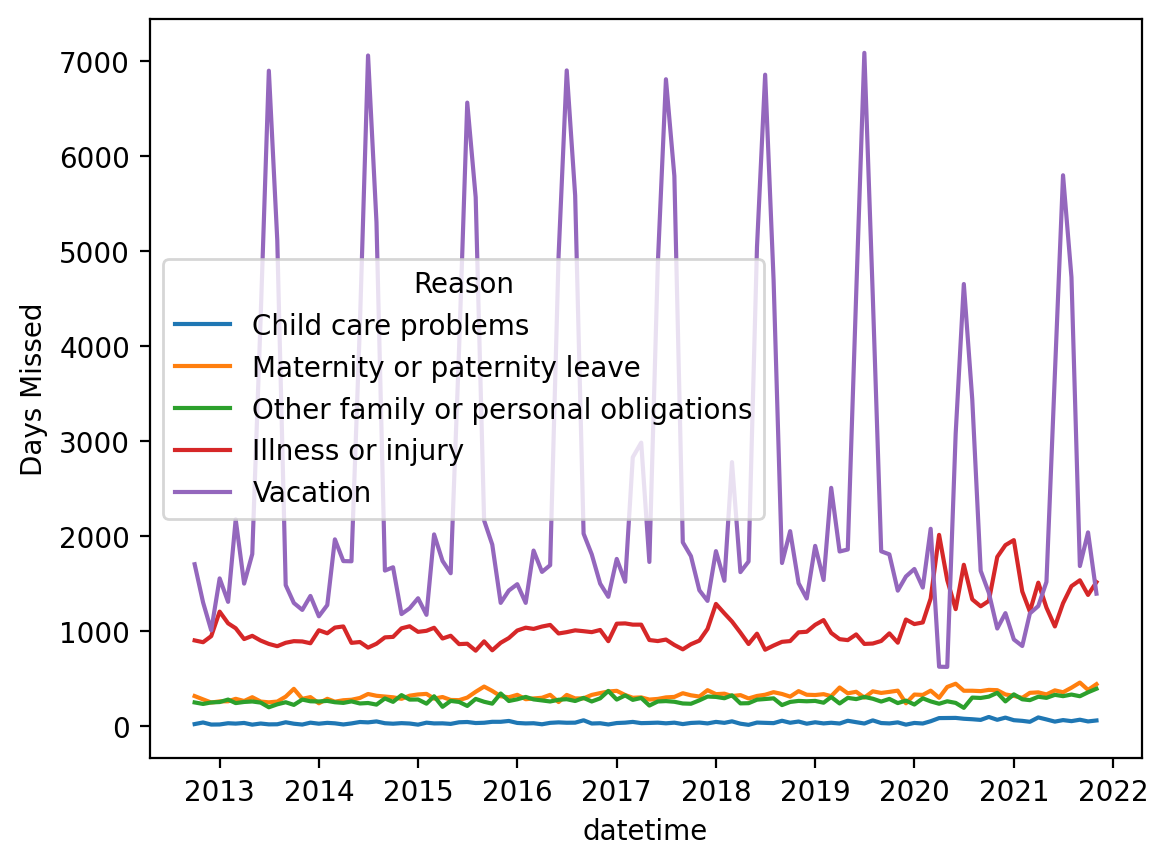

In [79]:
sns.lineplot(data = df_melted, x = "datetime", y = "Days Missed", hue = "Reason");

## Data Transformations

Sometimes we come across a situation where we have problems with skewed distributions or we simply want to transform, recode or perform discretization. Let's look at some of the most popular transformation methods.

First, standardization (also known as normalization):

- **$Z$-score** approach - a standardization procedure, using the formula: $z=\frac{x-\mu}{\sigma}$, where $\mu$ = mean and $\sigma$ = standard deviation. $Z$ scores are also known as standardized scores; these are scores (or data values) that have been assigned a common *standard*. This standard is a mean of zero and a standard deviation of 1.

- **minmax** approach - An alternative approach to normalizing (or standardizing) the $Z$ score is the so-called MinMax scaling (often also called simply "normalization" - which is a common cause of ambiguity). In this approach, the data is scaled to a fixed range - usually from 0 to 1. The trade-off of having this limited range - unlike normalization - is that we get smaller standard deviations, which can suppress the effect of outliers. If you want to do MinMax scaling - simply subtract the minimum value and divide it by the range: $(x-min)/(max-min)$.

To solve problems with very skewed distributions, we can also use several types of simple transformations:

- $log$
- $log+1$
- $sqrt$
- $x^2$
- $x^3$

***Exercise:*** Normalize income and plot the transformed income distribution in a box plot.

In [63]:
income = pd.read_csv("data/models/income.csv")
income.head(3)

,Education,Seniority,Income
0,21.586207,113.103448,99.917173
1,18.275862,119.310345,92.579135
2,12.068966,100.689655,34.678727


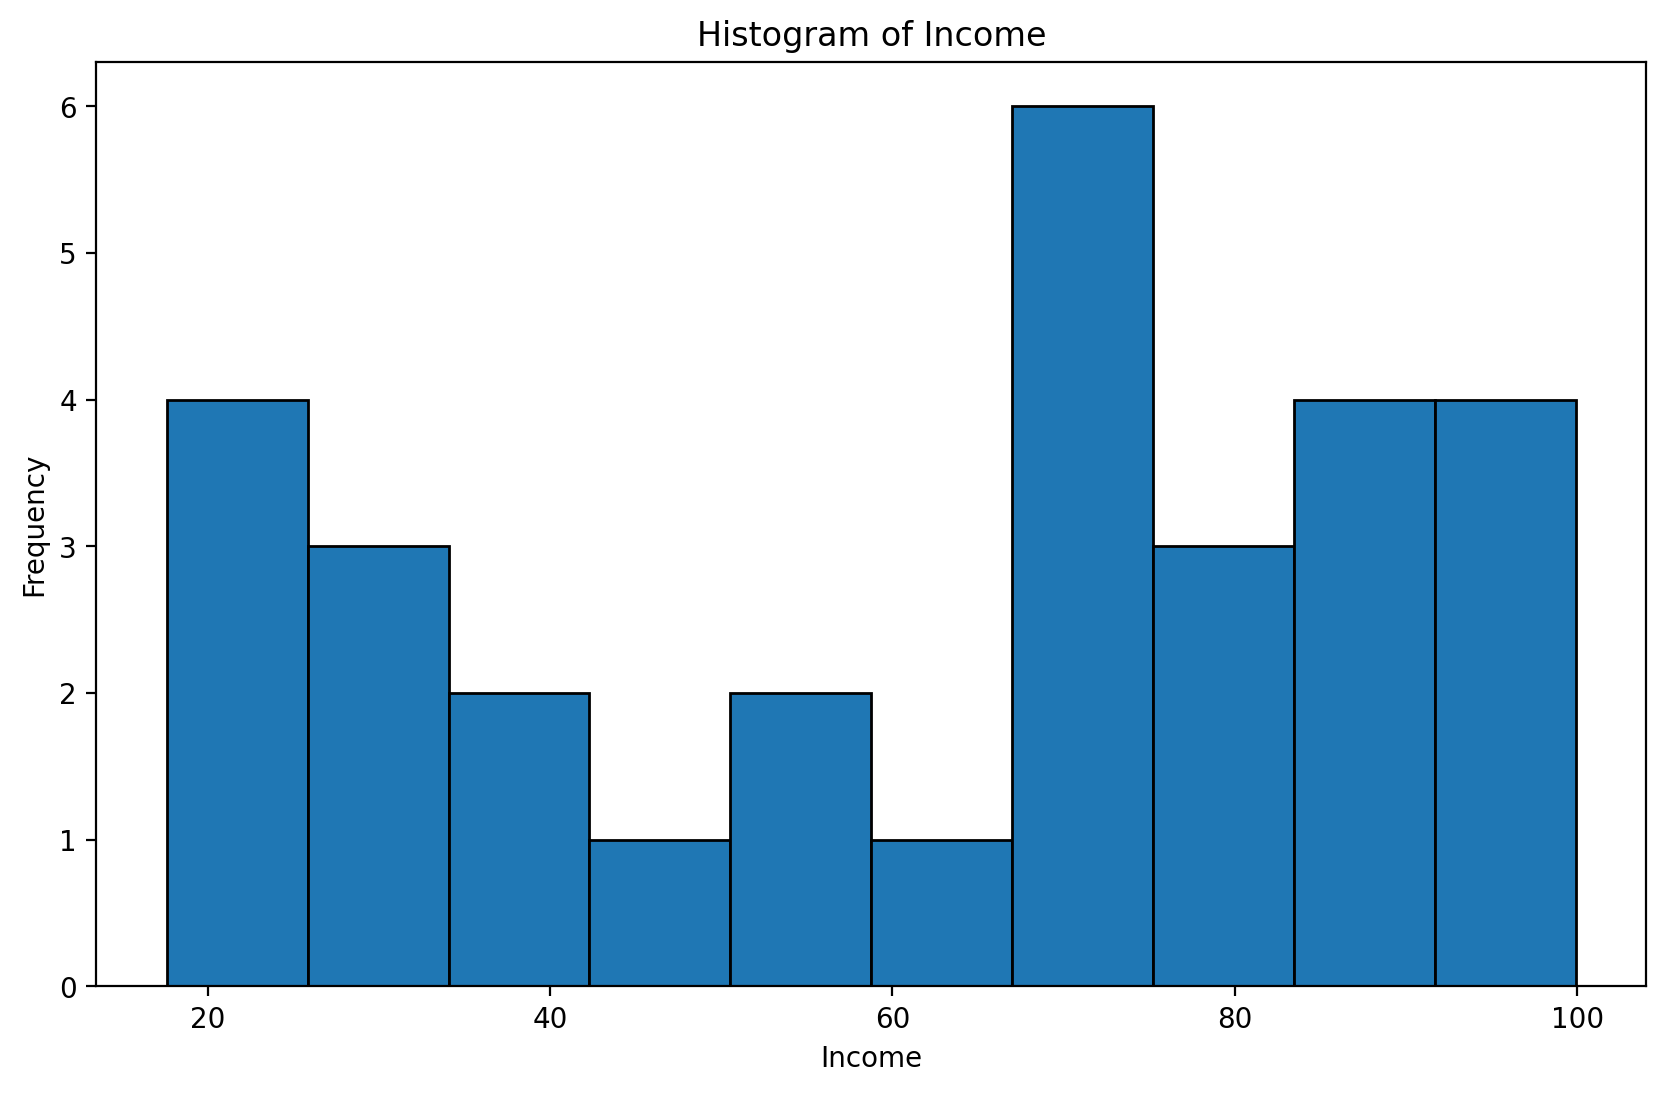

In [65]:
plt.figure(figsize=(10, 6))
plt.hist(income['Income'], edgecolor='black')
plt.title('Histogram of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# your code here

### Box - Cox Transformations

The Box-Cox transformation is a technique used in data wrangling that helps stabilize the variance and transform the data so that it is closer to a normal distribution—which is desirable in many statistical analysis and modeling methods. This transformation works particularly well for data with a right-skewed distribution. It requires positive values ​​and involves finding the optimal parameter λ (lambda), which is chosen using the maximum likelihood method. In Python, the Box-Cox transformation can be performed using the boxcox function from the scipy.stats module.

Let $y=(y_1,y_2,…,y_n)$ be the data to which the Box-Cox transformation is to be applied. Box and Cox defined their transformation as:

for $\lambda \neq 0$:

$$
y{(i)}^{\lambda}=\frac{1}{\lambda}*(y_{i}^{\lambda}-1)
$$

for $\lambda = 0$

$$
log(y_i)
$$

such as the unknown $\lambda$,

$$
y^\lambda=X* \beta + \epsilon
$$

where $y^{(\lambda)}$ is the $\lambda$-transformed data, X is the design matrix (possible covariates of interest), $\beta$ is a set of parameters associated with the $\lambda$-transformed data, and $ϵ = (ϵ_1, ϵ_2, ..., ϵ_n)$ is an error term. Since the goal of equation (1) is that

$$
y^{(\lambda)} \epsilon ~ N(X* \beta, \sigma^2*I_n), (3)
$$
then $\epsilon ~ N(0, \sigma^2)$. Note that the transformation in equation (1) is only valid for $y_i$ > 0, i = 1, 2, ..., n, and modifications must be made when negative observations are present.

In [66]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import boxcox

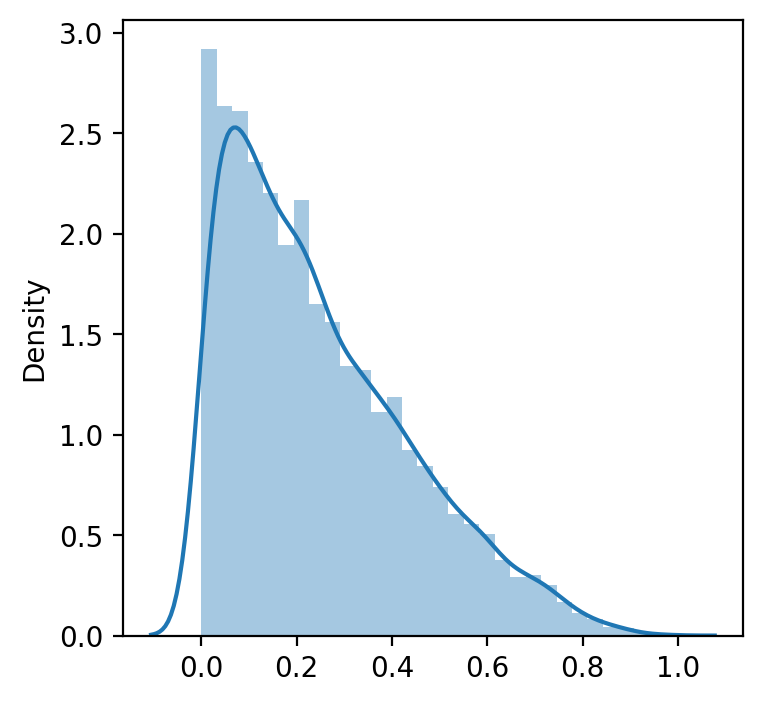

In [67]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (4, 4))
data = np.random.beta(1, 3, 5000) # we create random non normal data (from beta distribution)
sns.distplot(data)
plt.show()

In [68]:
data_transformed, lambda_ = boxcox(data) #If lambda is None, the second argument returned is a lambda that maximizes the log-likelihood function.
print('Transformed data to normal distribution', data_transformed)
print(40*'==')
print('Lambda, which maximizes the log-likelihood function for the normal distribution:', lambda_)

Transformed data to normal distribution [-1.18780311 -1.24561546 -0.73856995 ... -1.36663233 -1.20507286
 -0.89269272]
Lambda, which maximizes the log-likelihood function for the normal distribution: 0.40914726473864266


In [69]:
manually_transformed = [(i**lambda_ -1)/lambda_ for i in data] # manually

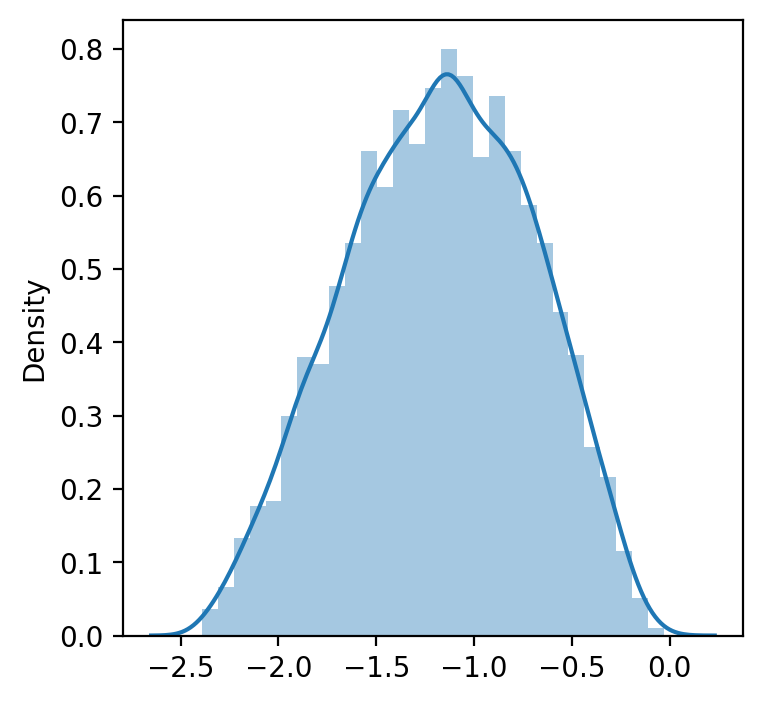

In [70]:
warnings.filterwarnings('ignore')
plt.figure(figsize = (4, 4))
sns.distplot(data_transformed)
plt.show()

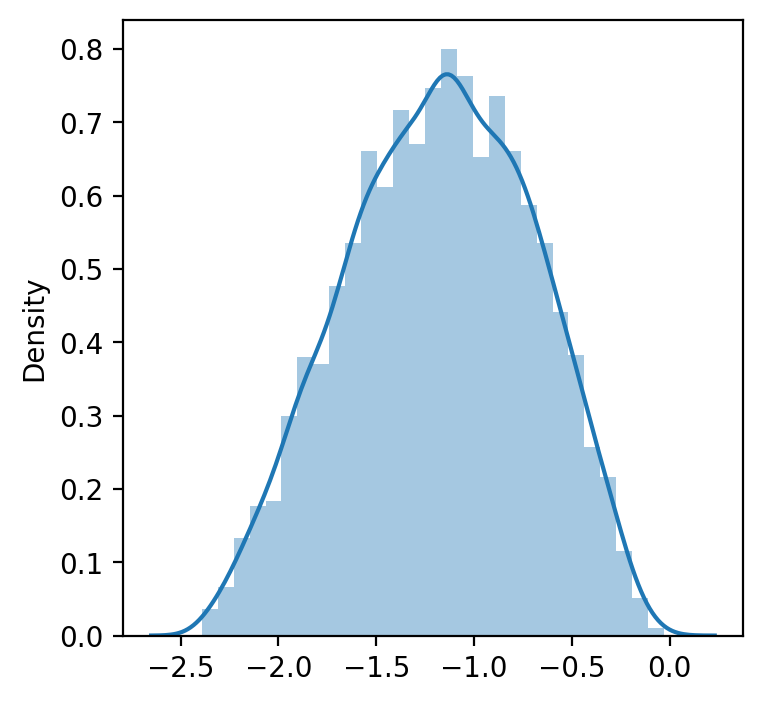

In [71]:
warnings.filterwarnings('ignore')
plt.figure(figsize = (4, 4))
sns.distplot(manually_transformed) # manually selected lambda
plt.show()

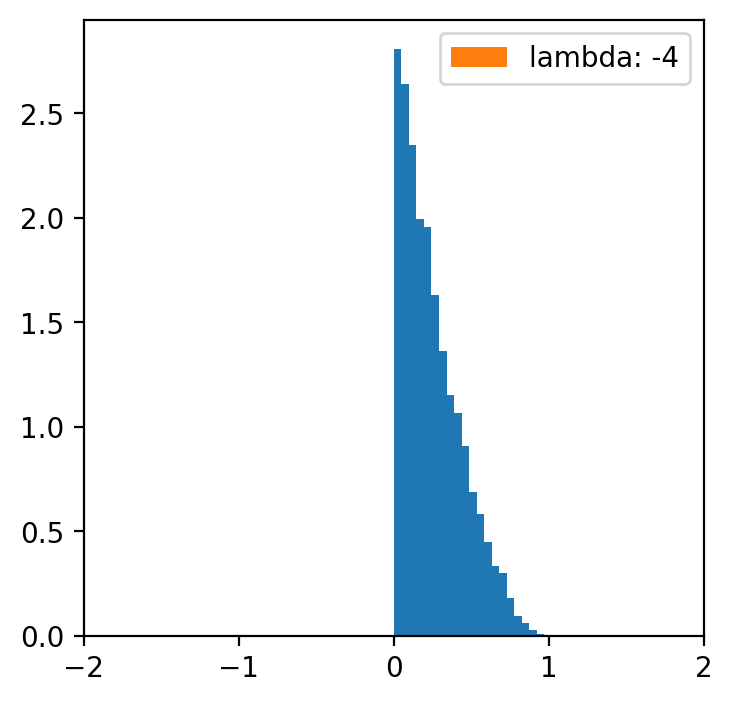

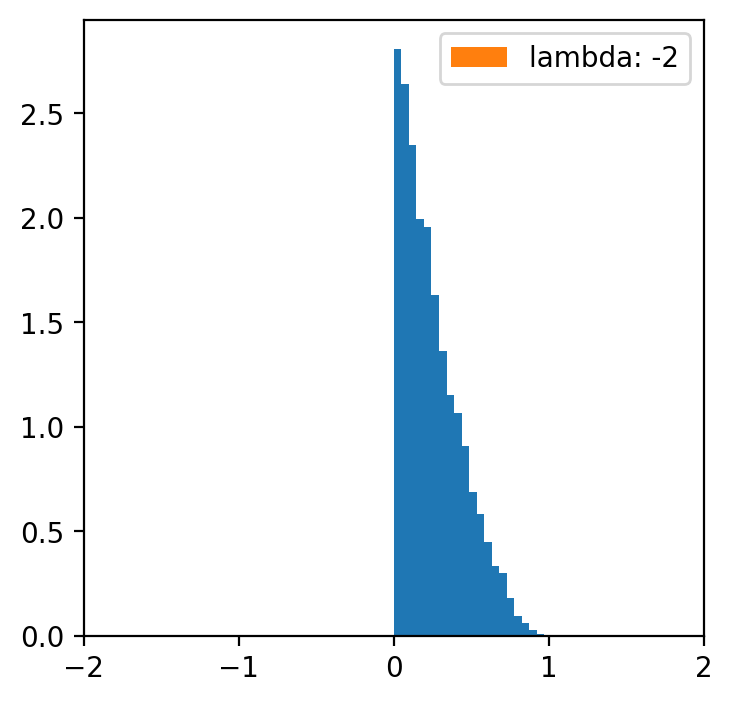

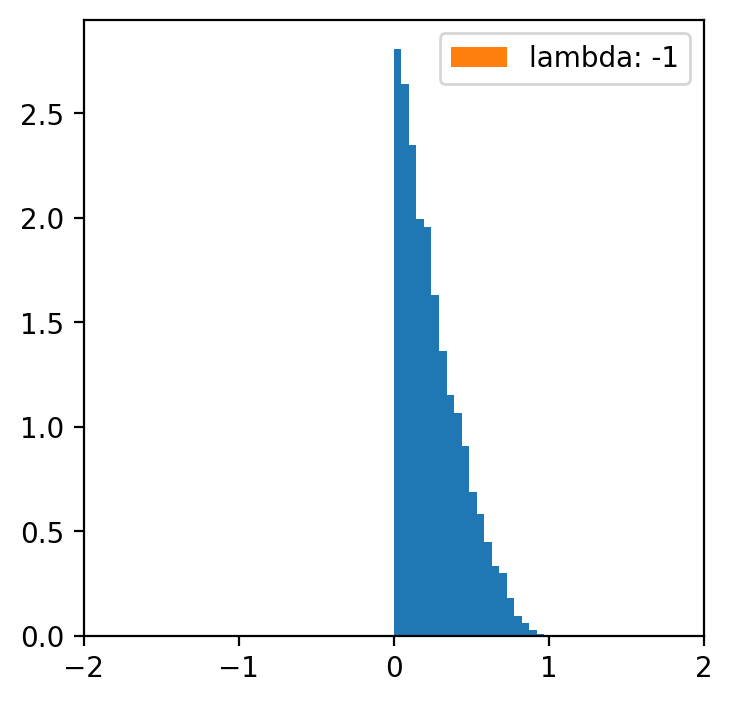

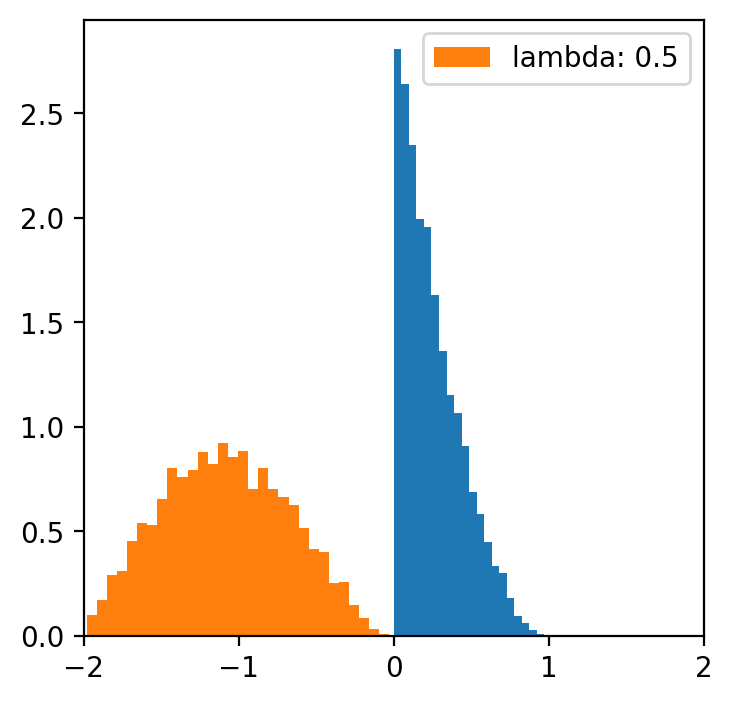

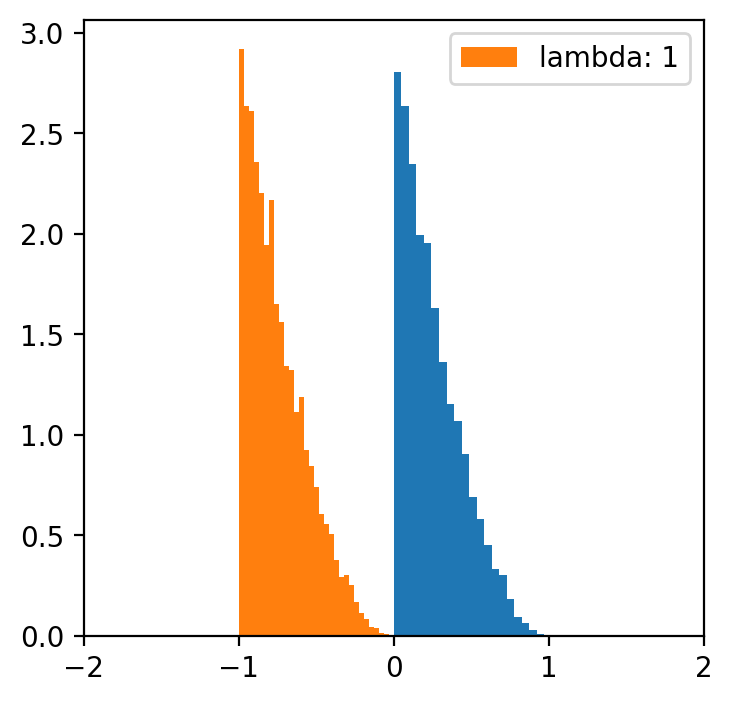

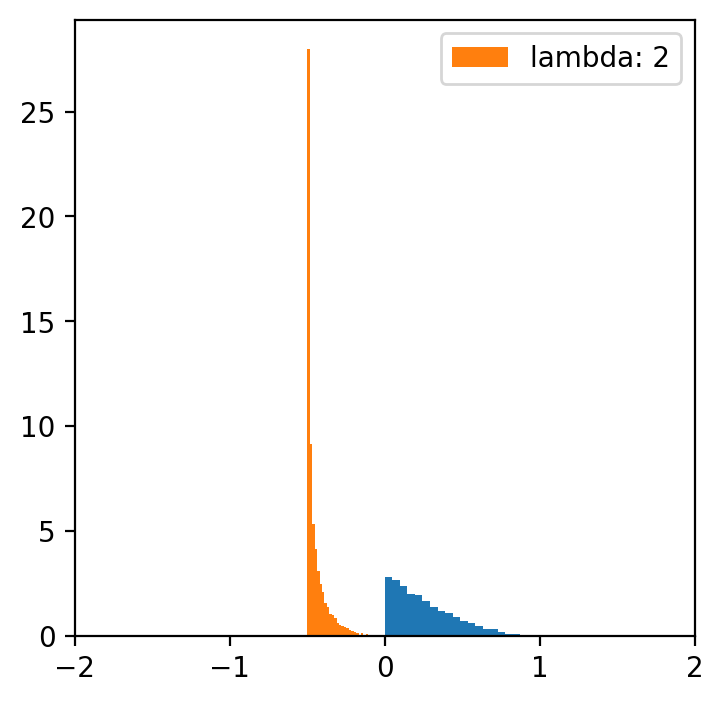

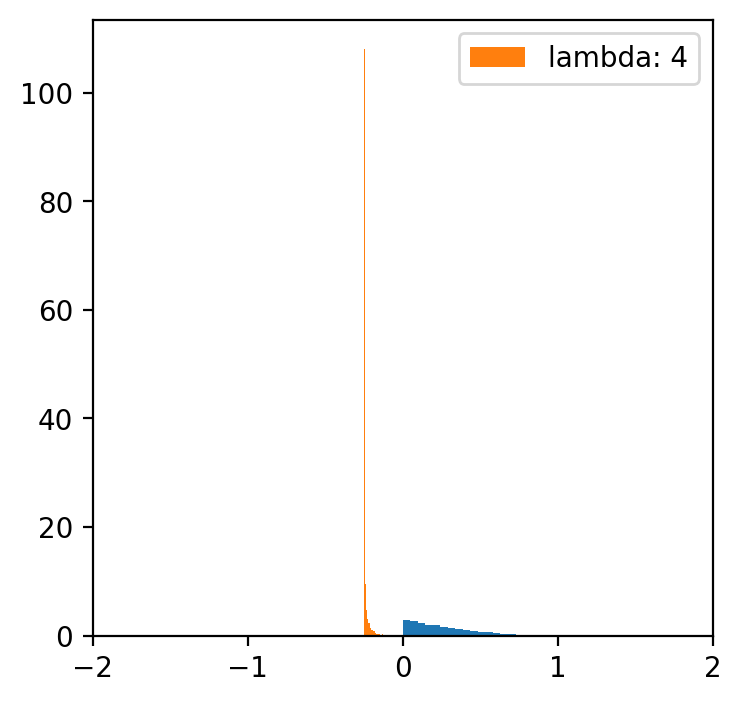

In [72]:
lambde = [-4,-2,-1,0.5,1,2,4] # only for lambda 0.5 we have a normal distribution
x = np.linspace(data.min(), data.max(), 5000)
for l in lambde:
    transformed = [(i**l -1)/l for i in data]
    plt.figure(figsize=(4,4))
    plt.hist(data, bins=20, density=True)
    plt.hist(transformed, bins=30, density=True, label = f'lambda: {l}')
    plt.xlim(-2, 2)
    plt.legend()

## Data categorization

Sometimes we would simply like to perform the so-called "binning" procedure to be able to analyze our categorical data, compare several categorical variables, construct statistical models, etc. With the "binning" function, we can transform quantitative variables into categorical ones using several methods:

1. **Quantile Binning** 
- Divides data into equal-sized groups based on percentiles.
Formula:
- Example: pd.qcut(data, q=4) creates 4 quantile-based bins.
2. **Equal-Width Binning** 
- binning to obtain a fixed length of intervals (e.g. every 100 USD)
- Formula:
$$ \text{Bin width} = \frac{\text{max(data)} - \text{min(data)}}{\text{number of bins}} $$
- Example: pd.cut(data, bins=5) creates 5 equal-width bins.
3. **Pretty Binning** 
- A compromise between quantile and equal-width binning, creating aesthetically pleasing intervals.
- Rounded values based on data range and bin count.
4. **K-Means Binning** 
- Uses the K-Means clustering algorithm to group data into bins.
- Formula:
$$ \text{Centroids minimize } \sum_{i=1}^{n} (x_i - \mu_k)^2 $$ 
- where $( \mu_k )$ is the mean of cluster $( k )$.
5. **Bag Clustering (BClust)** 
- Groups data using bagging techniques to improve clustering stability.
- Clusters are formed by aggregating results from multiple clustering models.

Each method is suited for different use cases, depending on the data distribution and analysis goals.

**Exercise** Using the quantile approach, binning the "Income" variable. Hint: Pandas has a ready-to-use function [pd.qcut](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html)

In [73]:
# Your code here

## Summary

That was an introduction to **data wrangling**.

- As mentioned, data organization is an incredibly important topic - and could be an entire subject in this postgraduate program.
- But today we focused on:
- Identifying and removing missing data.

- Merging data sets.

- Organizing data.